In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [65]:
df = pd.read_csv("dataset.csv")

In [66]:
df.head()

,Recency,Frequency,Monetary
0,650,2,230467
1,789,1,115035
2,726,1,109598
3,663,1,112147
4,770,1,111744


In [67]:
mms = MinMaxScaler()
df_scaled = mms.fit_transform(df)

In [68]:
df_scaled = pd.DataFrame(df_scaled, columns=['Recency', 'Frequency', 'Monetary'])

In [69]:
df_scaled

,Recency,Frequency,Monetary
0,0.012346,0.045455,0.088999
1,0.870370,0.000000,0.044423
2,0.481481,0.000000,0.042323
3,0.092593,0.000000,0.043308
4,0.753086,0.000000,0.043152
...,...,...,...
2233,0.154321,0.000000,0.043308
2234,0.617284,0.000000,0.071863
2235,0.259259,0.000000,0.043308
2236,0.197531,0.000000,0.086615


In [70]:
def custom_kmedoids(data, medoids, distance_func):
  """
  Performs k-medoids clustering with custom medoids and distance function.

  Args:
      data: A pandas dataframe containing the data points.
      medoids: A list of data points representing the initial medoids.
      distance_func: A function that calculates the distance between two data points.

  Returns:
      A list containing cluster labels for each data point.
  """
  data_points = data.values
  n_clusters = len(medoids)

  # Initialize clusters with medoids
  clusters = [[] for _ in range(n_clusters)]
  for i, point in enumerate(data_points):
    distances = [distance_func(point, medoid) for medoid in medoids]
    cluster_label = distances.index(min(distances))
    clusters[cluster_label].append(i)

  # Iterate until convergence
  converged = False
  while not converged:
    converged = True
    new_clusters = [[] for _ in range(n_clusters)]
    for cluster_label, points in enumerate(clusters):
      for point_index in points:
        distances = [distance_func(data_points[point_index], medoid) for medoid in medoids]
        new_cluster_label = distances.index(min(distances))
        if new_cluster_label != cluster_label:
          converged = False
        new_clusters[new_cluster_label].append(point_index)
    clusters = new_clusters

  # Assign labels to data points
  labels = [-1] * len(data_points)
  for i, cluster in enumerate(clusters):
    for point_index in cluster:
      labels[point_index] = i

  return labels

# Define distance functions
def euclidean_distance(p1, p2):
  return np.linalg.norm(p1 - p2)

def manhattan_distance(p1, p2):
  return np.sum(np.abs(p1 - p2))

def chebyshev_distance(p1, p2):
  return np.max(np.abs(p1 - p2))

def plot_clusters(data, option, labels, medoids, title, size):
  """
  Plots the data points with labels and medoids.

  Args:
      data: A pandas dataframe containing the data points.
      labels: A list containing cluster labels for each data point.
      medoids: A list of data points representing the medoids.
      title: The title for the plot.
  """
  colors = plt.colormaps.get_cmap('Set2')(labels)  # Use colormap for labels

  # Plot data points with colors based on labels
  plt.figure(figsize=size)
  plt.scatter(data[option[0]], data[option[1]], c=colors, alpha=0.5, label='Data')

  # Plot medoids with different marker
  i = 0
  medoid_colors = plt.colormaps.get_cmap('Set1')([0, 1, 2, 3, 4])
  for medoid in medoids:
    plt.scatter(medoid[option[2]], medoid[option[3]], marker='*', s=100, c=medoid_colors[i], label='C{}'.format(i))
    i += 1

  # Add labels and title
  plt.xlabel(option[0])
  plt.ylabel(option[1])
  plt.title(title)
  plt.legend()
  plt.savefig("[{}-{}] - {}.png".format(option[0], option[1], title), bbox_inches='tight')
  plt.show()

In [71]:
data = df_scaled

medoids = [
  [0.938, 0.000, 0.046],
  [0.198, 0.000, 0.087],
  [0.617, 0.000, 0.072],
  [0.093, 0.000, 0.043],
  [0.432, 0.000, 0.050]

]

jenisFitur1 = ["Recency", "Frequency", 0, 1]
jenisFitur2 = ["Recency", "Monetary", 0, 2]
jenisFitur3 = ["Frequency", "Monetary", 1, 2]

In [72]:
# testing
# n_clusters = 5
# print(f"Clustering with {n_clusters} clusters:")
# for distance_func in [euclidean_distance, manhattan_distance, chebyshev_distance]:
#     distance_name = distance_func.__name__.replace("_", " ")
#     labels = custom_kmedoids(data.copy(), medoids[:n_clusters], distance_func)
#     print(f"  - {distance_name}")  # print(f"  - {distance_name}: {labels}")
#     for opt in [jenisFitur1, jenisFitur2, jenisFitur3]:
#         plot_clusters(data.copy(), opt, labels, medoids[:n_clusters], f"{distance_name} - {n_clusters} clusters", (24, 9))

Clustering with 2 clusters:
  - euclidean distance


C:\Users\super\AppData\Local\Temp\ipykernel_18192\3746836732.py:75: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(medoid[option[2]], medoid[option[3]], marker='*', s=100, c=medoid_colors[i], label='C{}'.format(i))


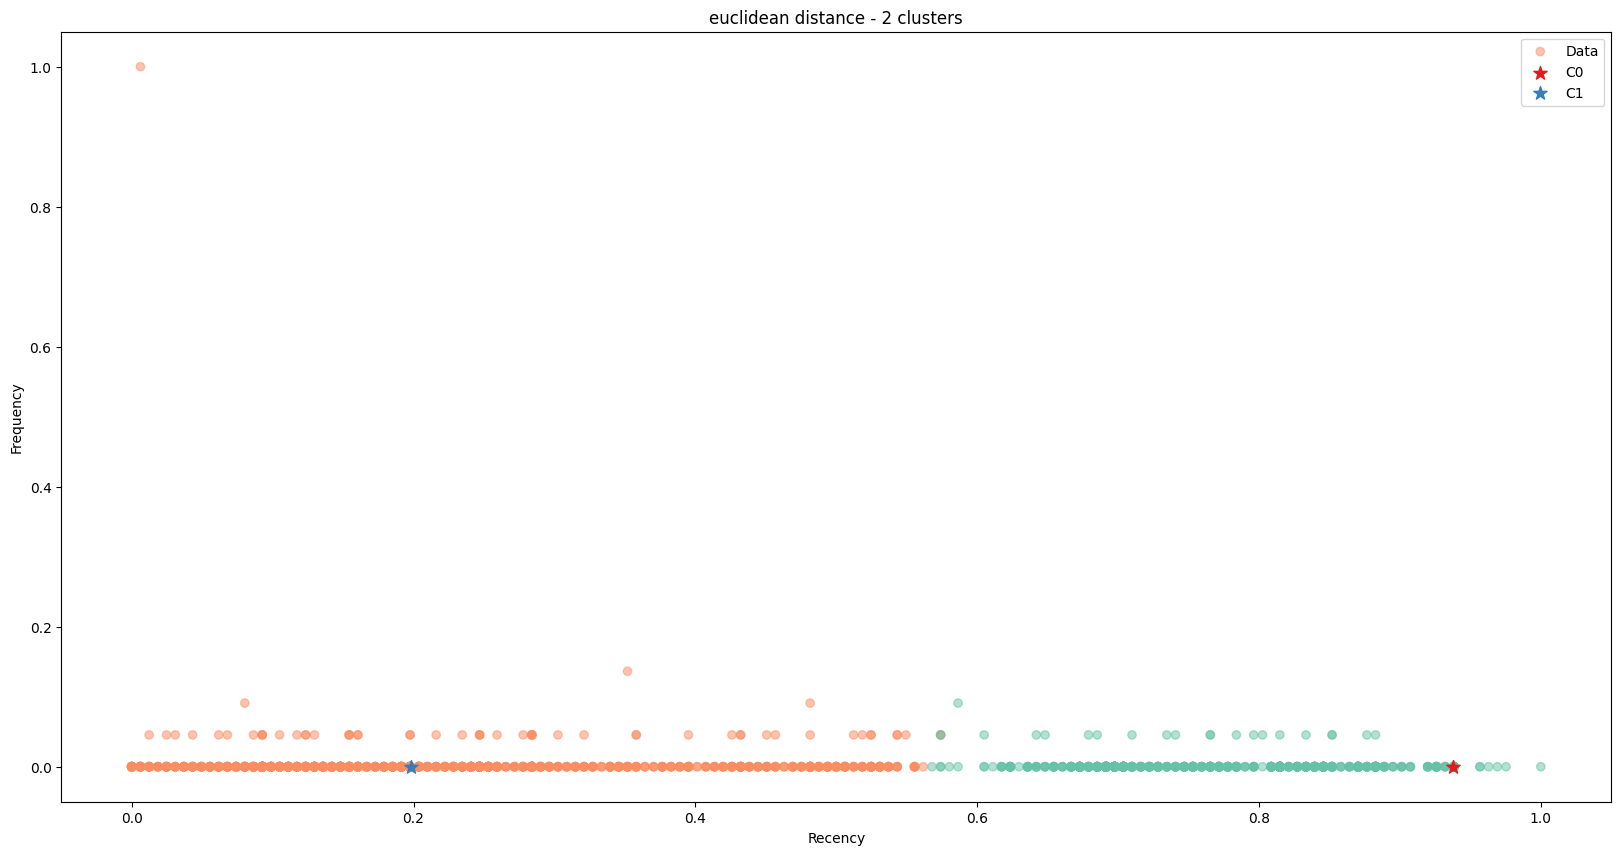

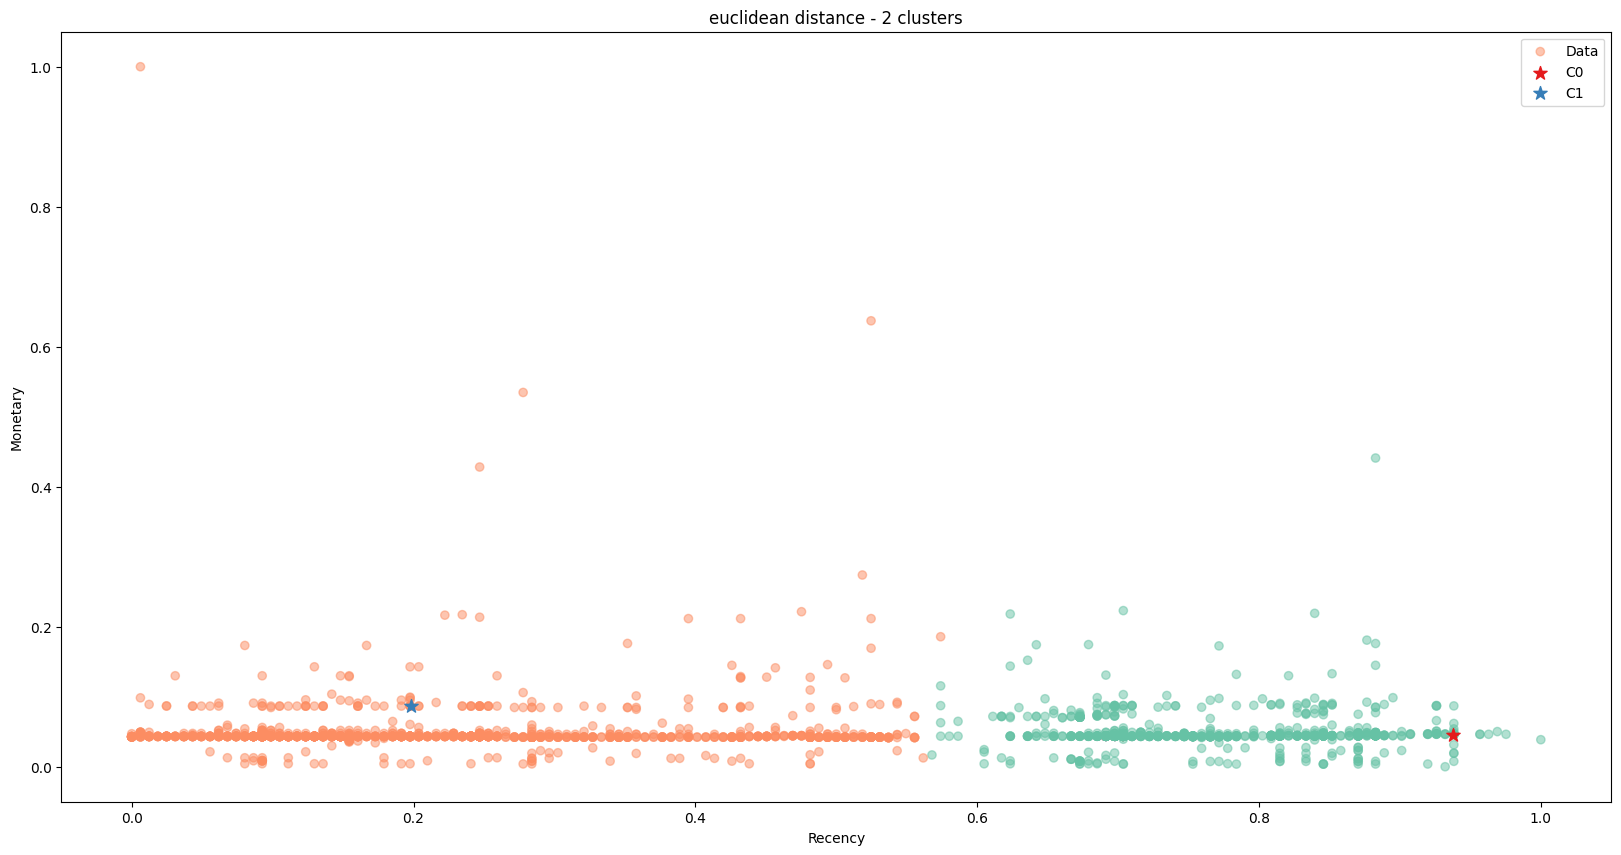

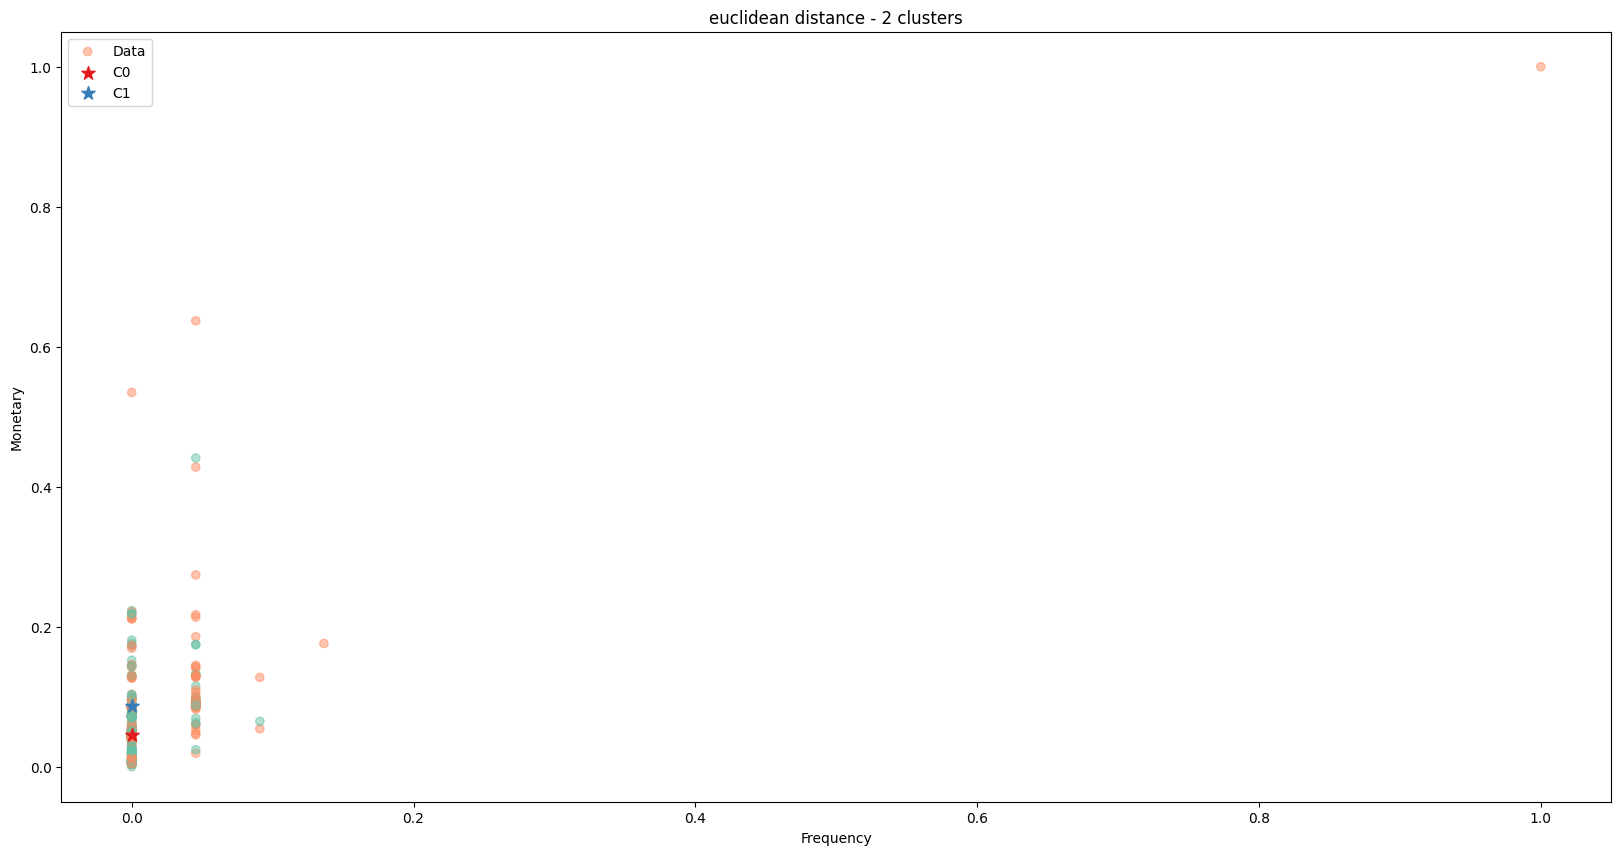

  - manhattan distance


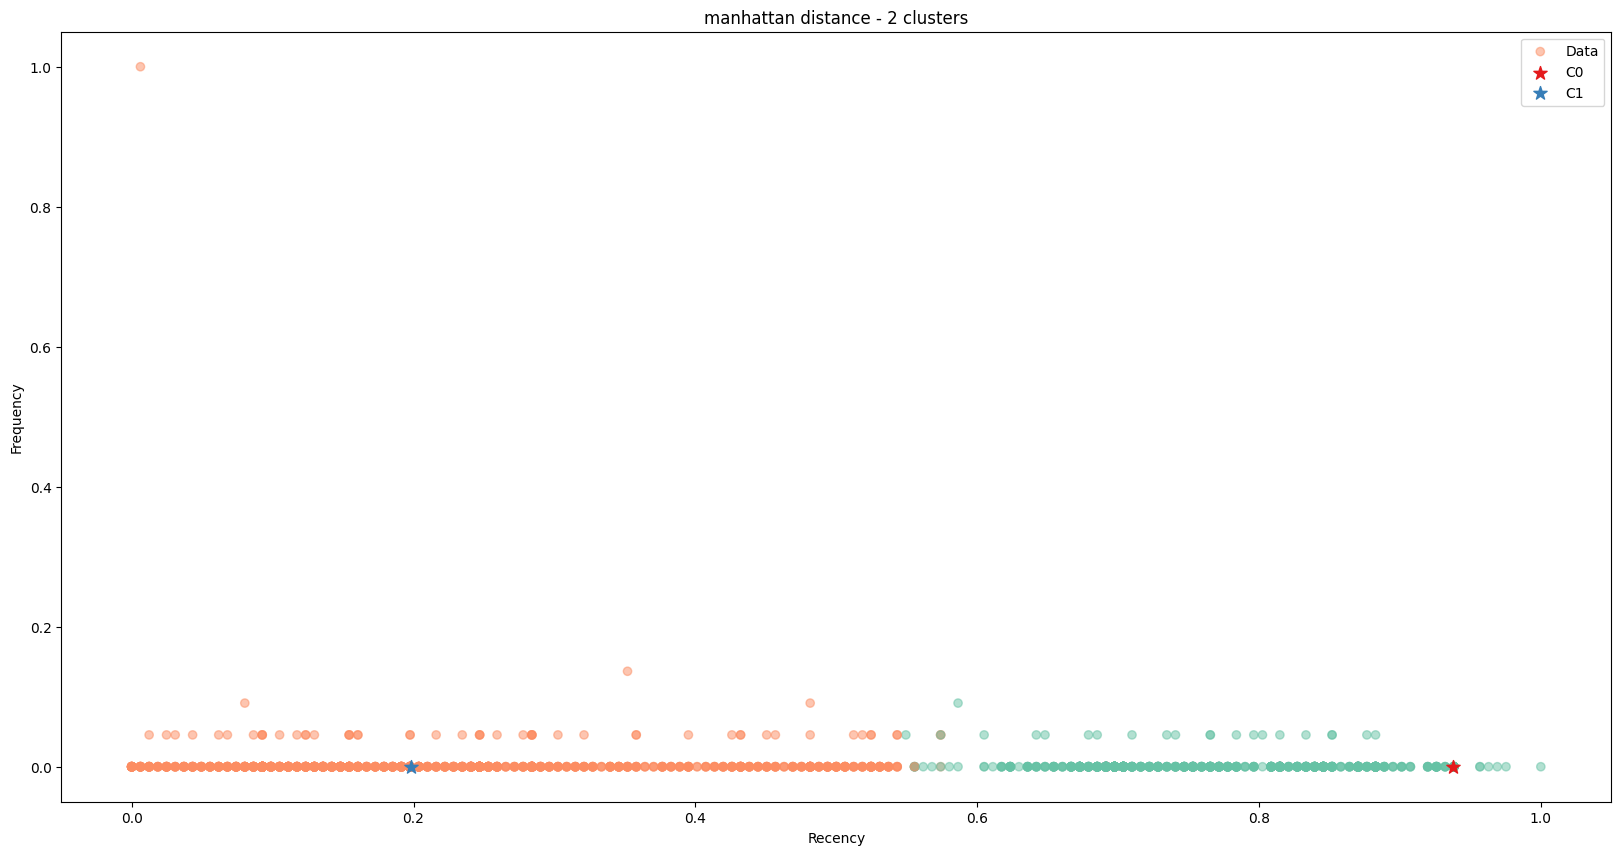

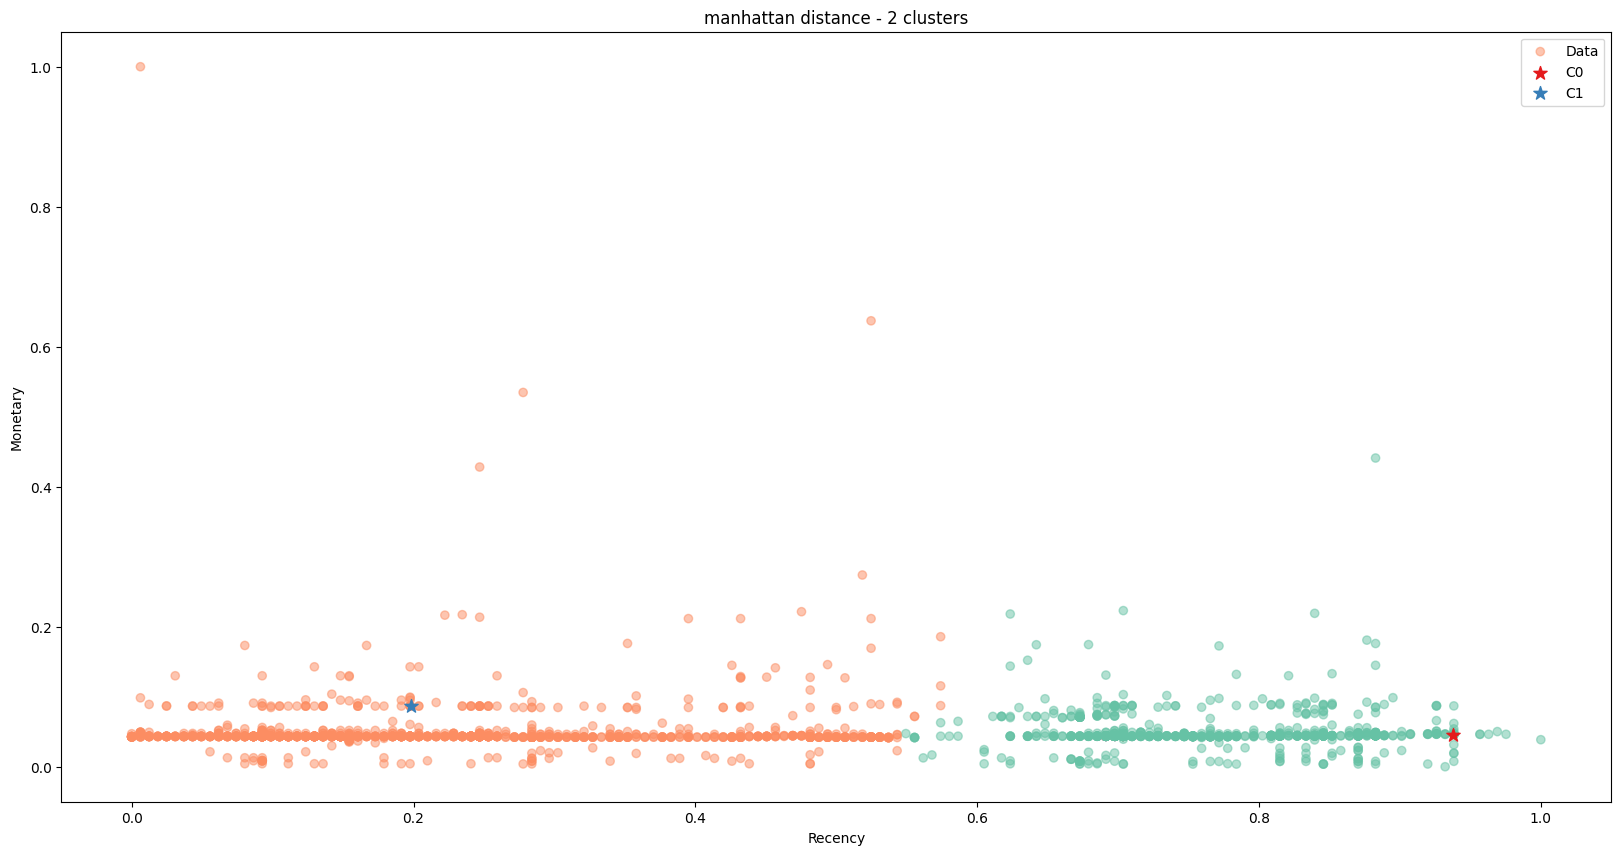

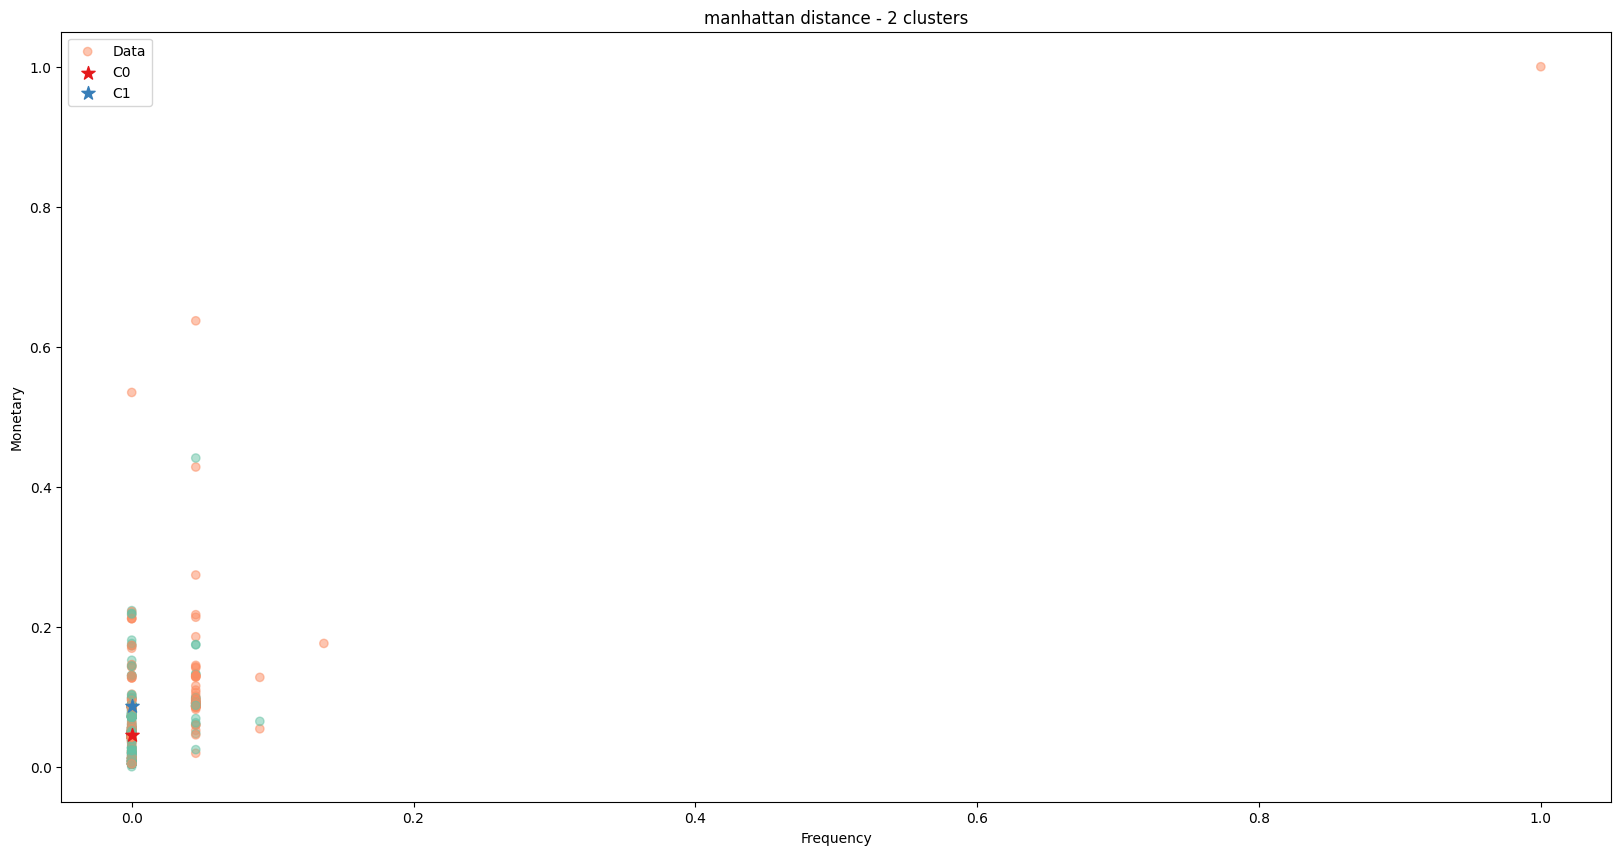

  - chebyshev distance


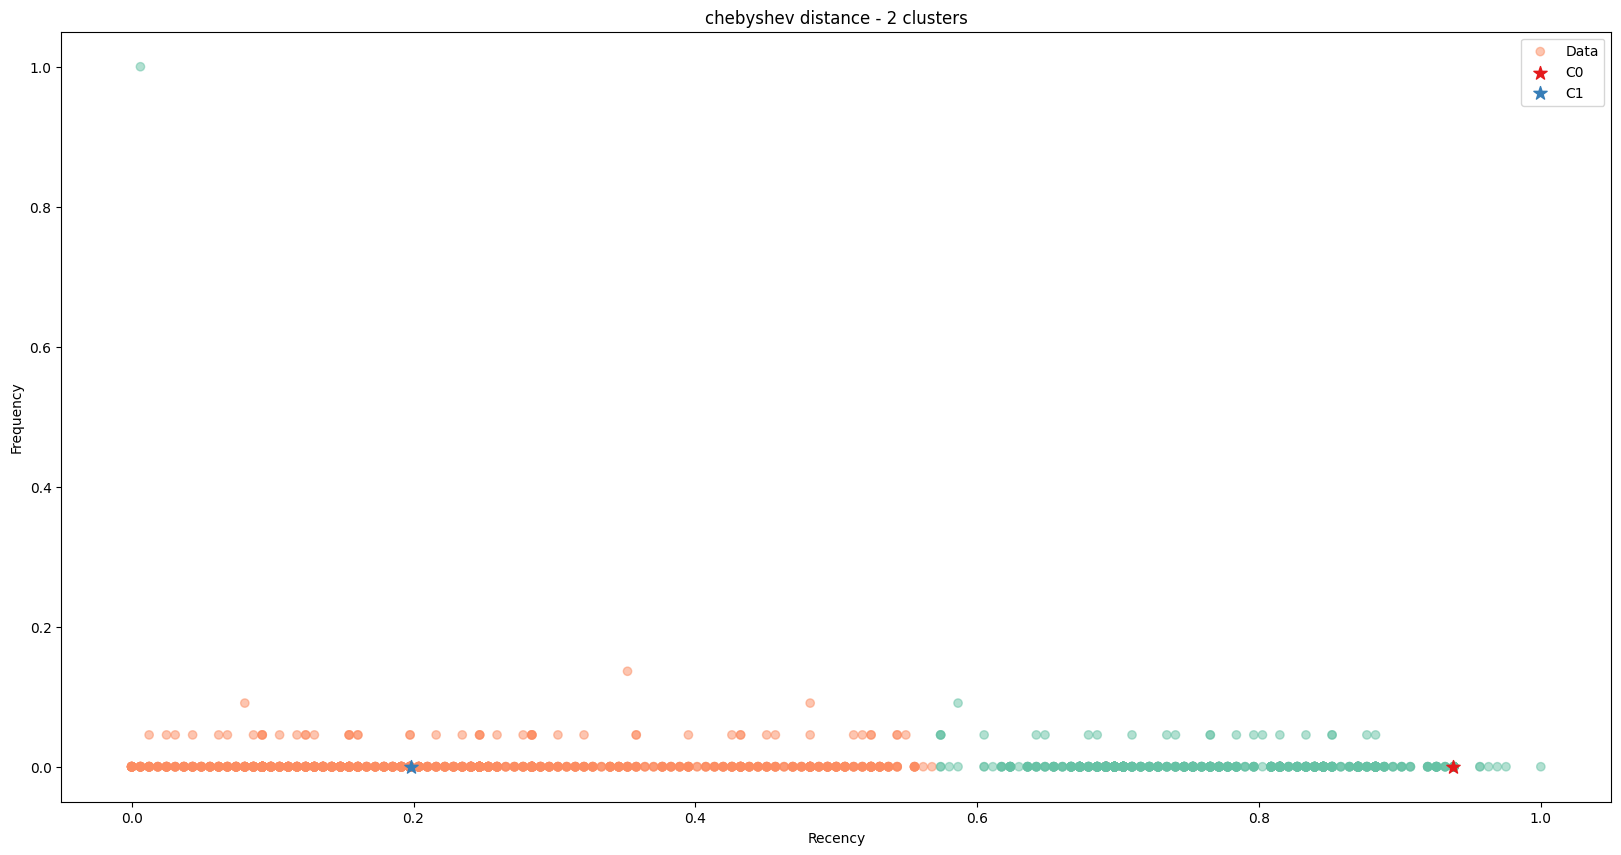

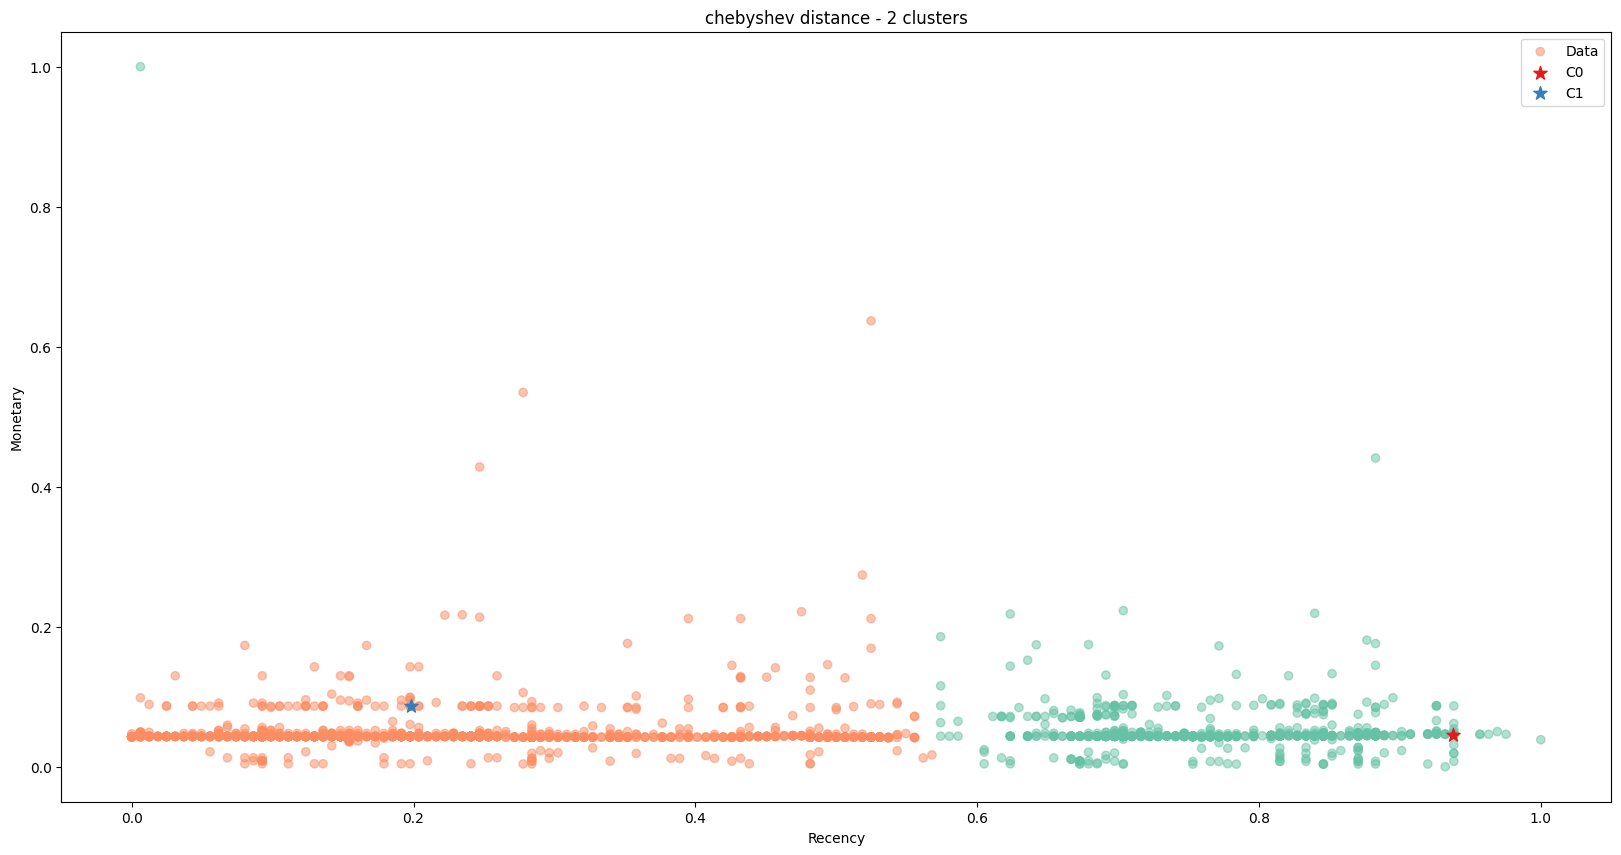

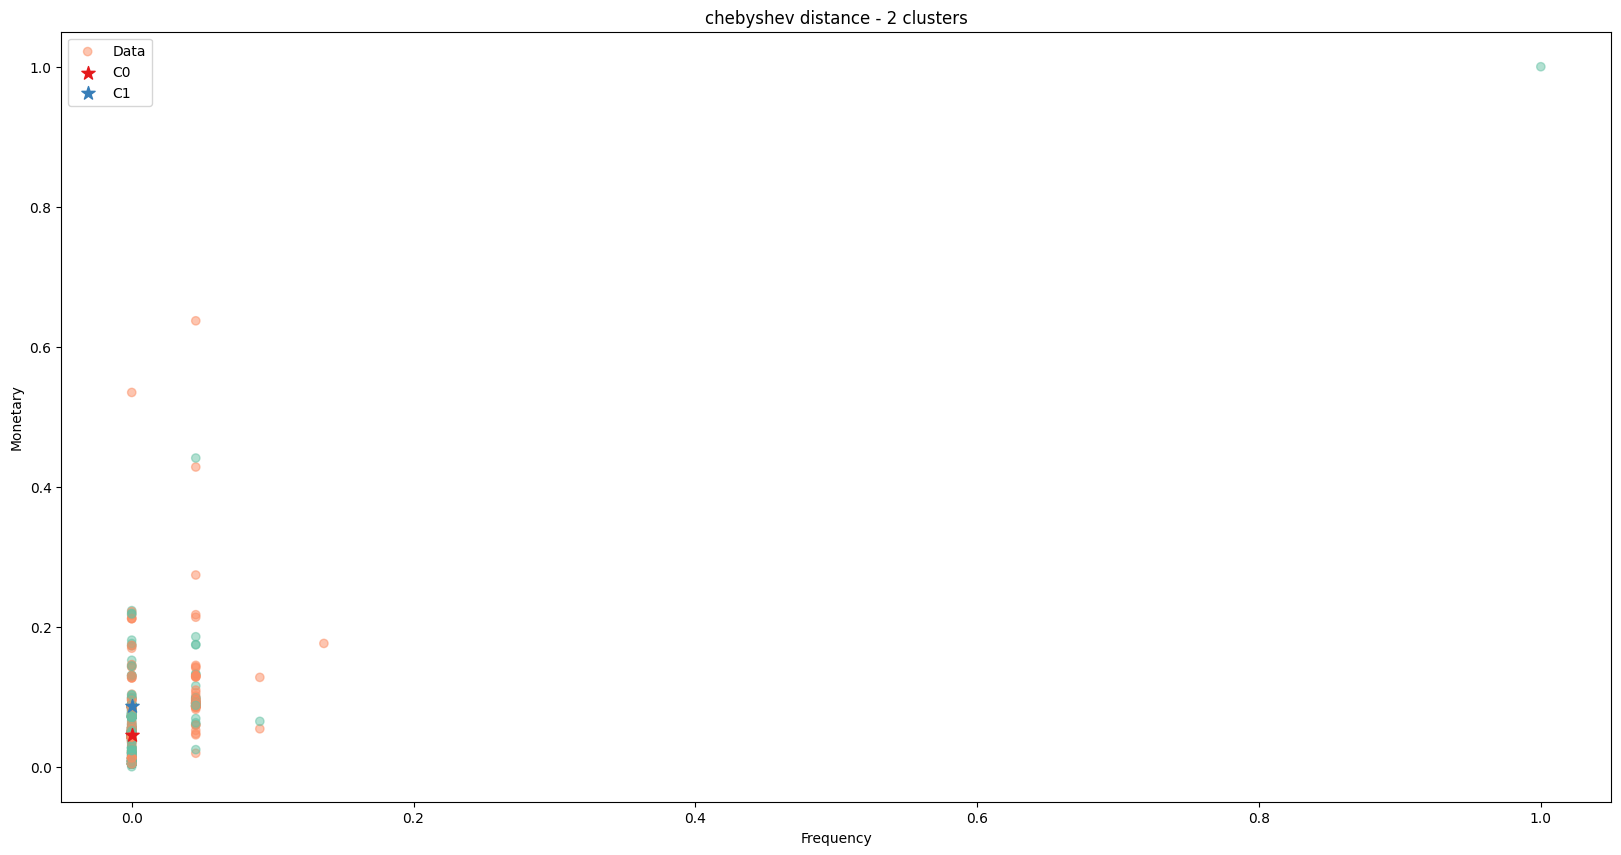

Clustering with 3 clusters:
  - euclidean distance


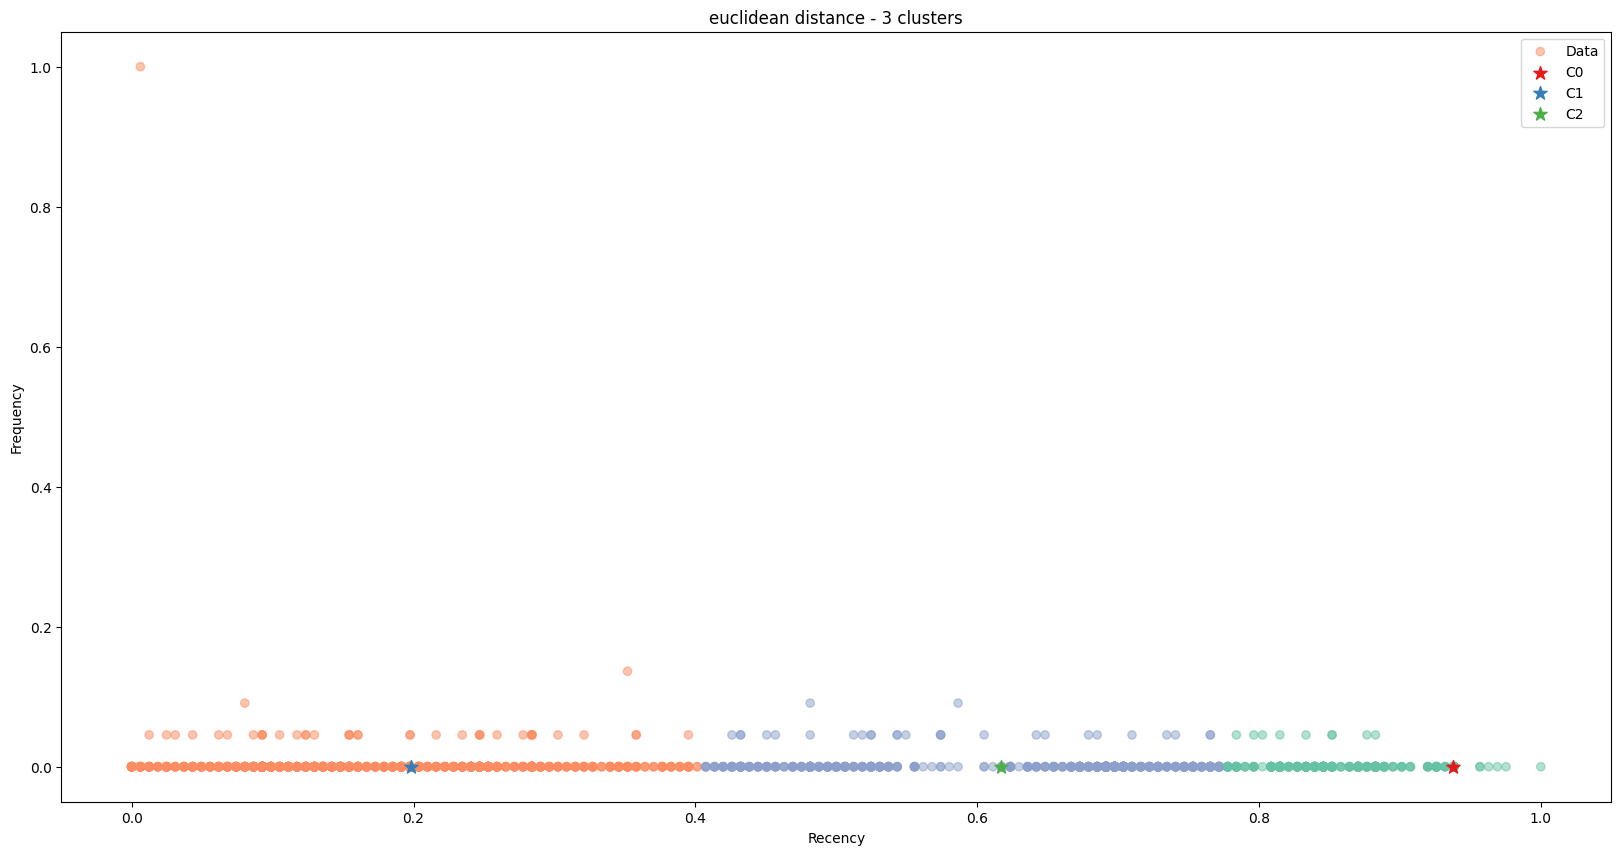

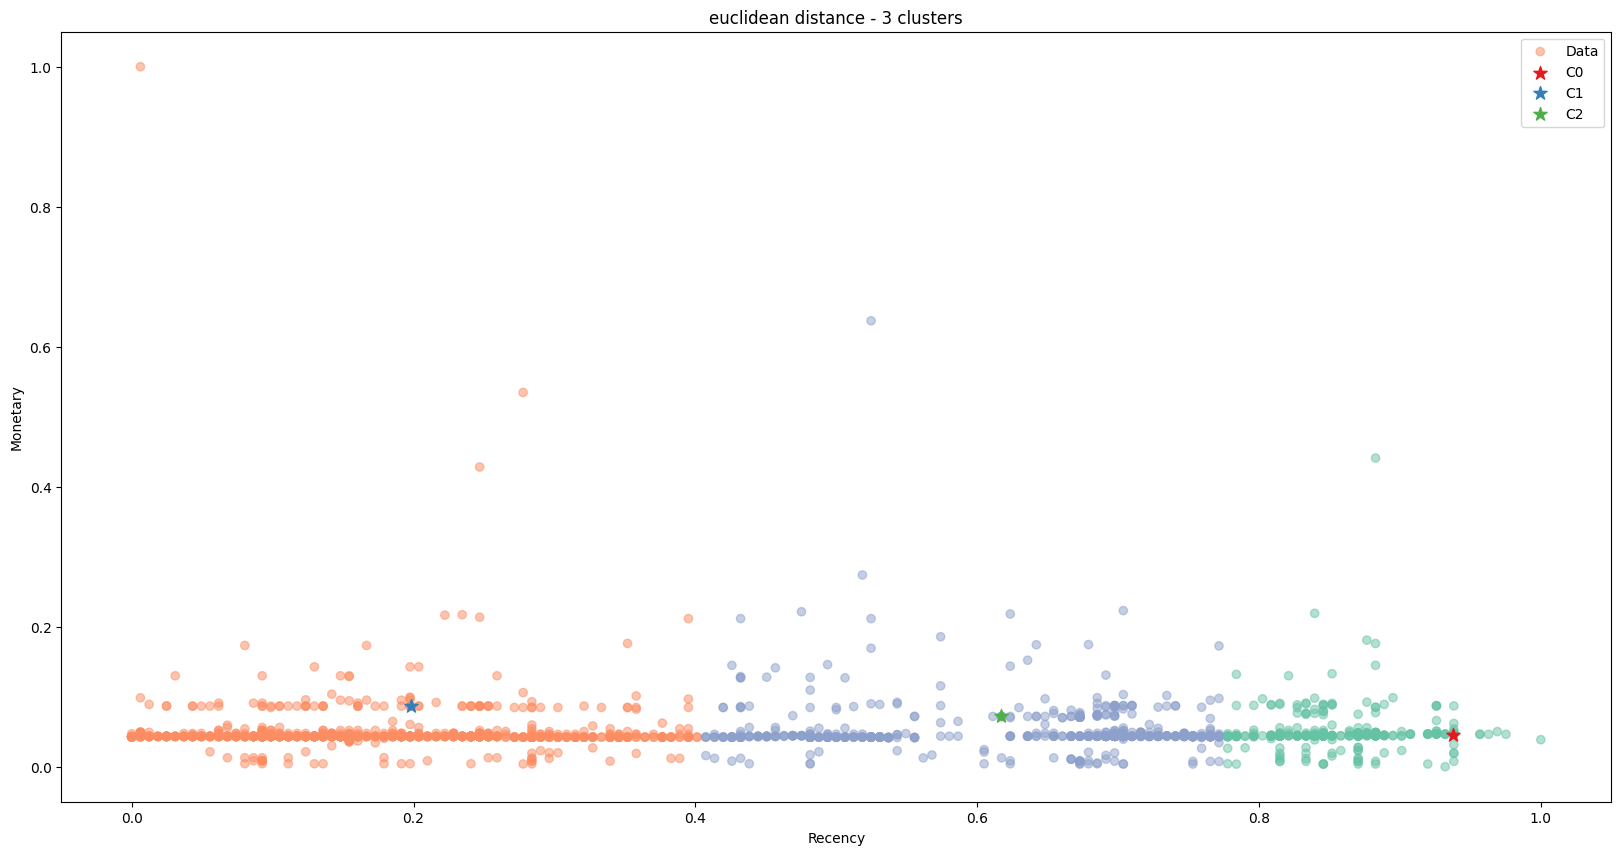

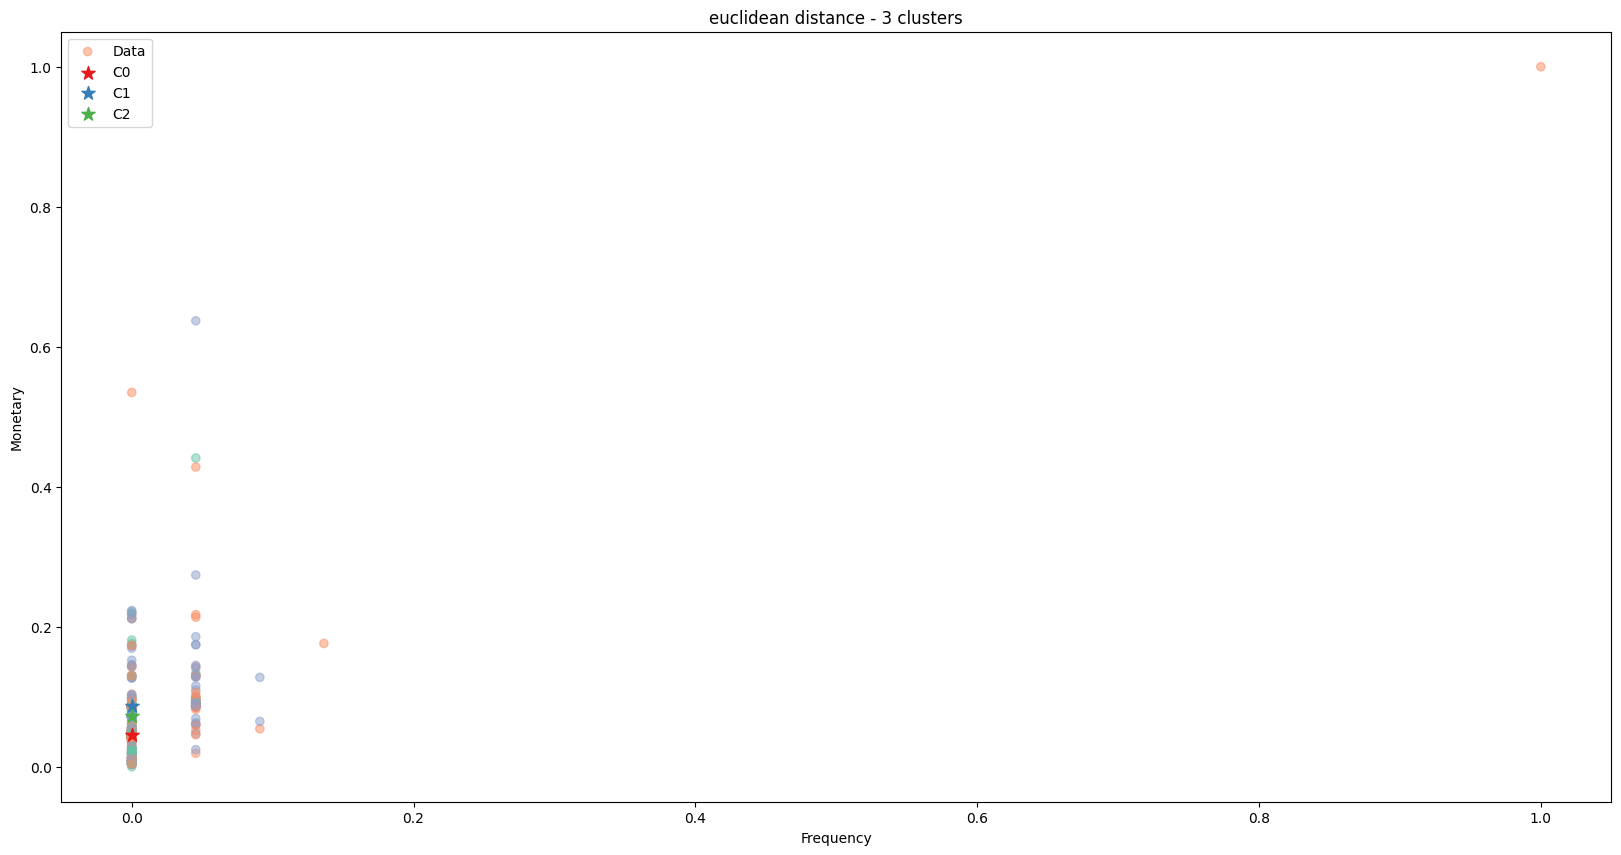

  - manhattan distance


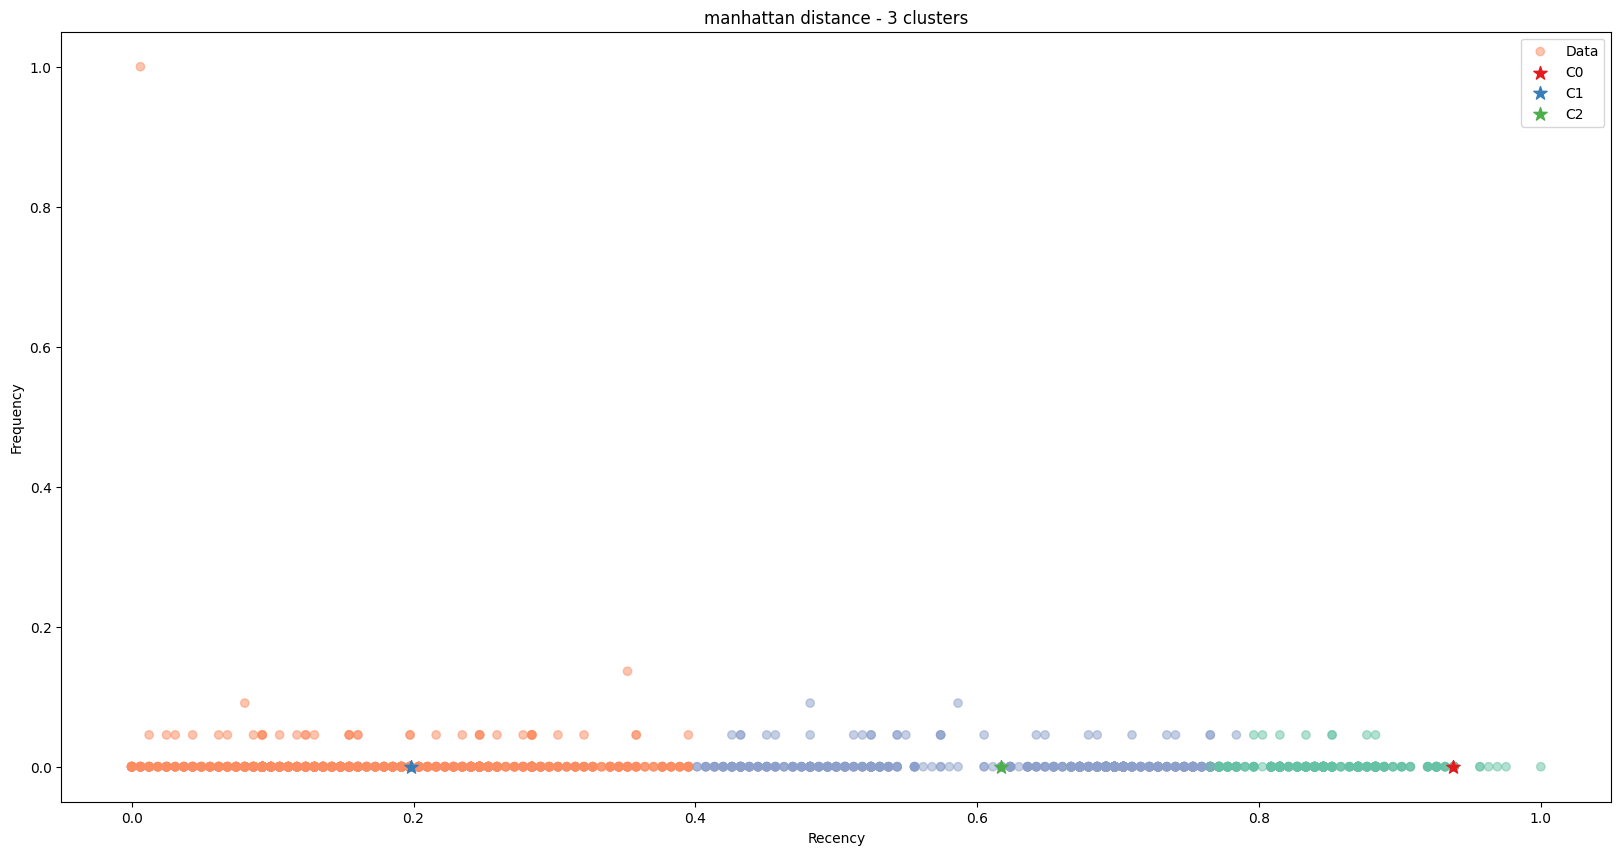

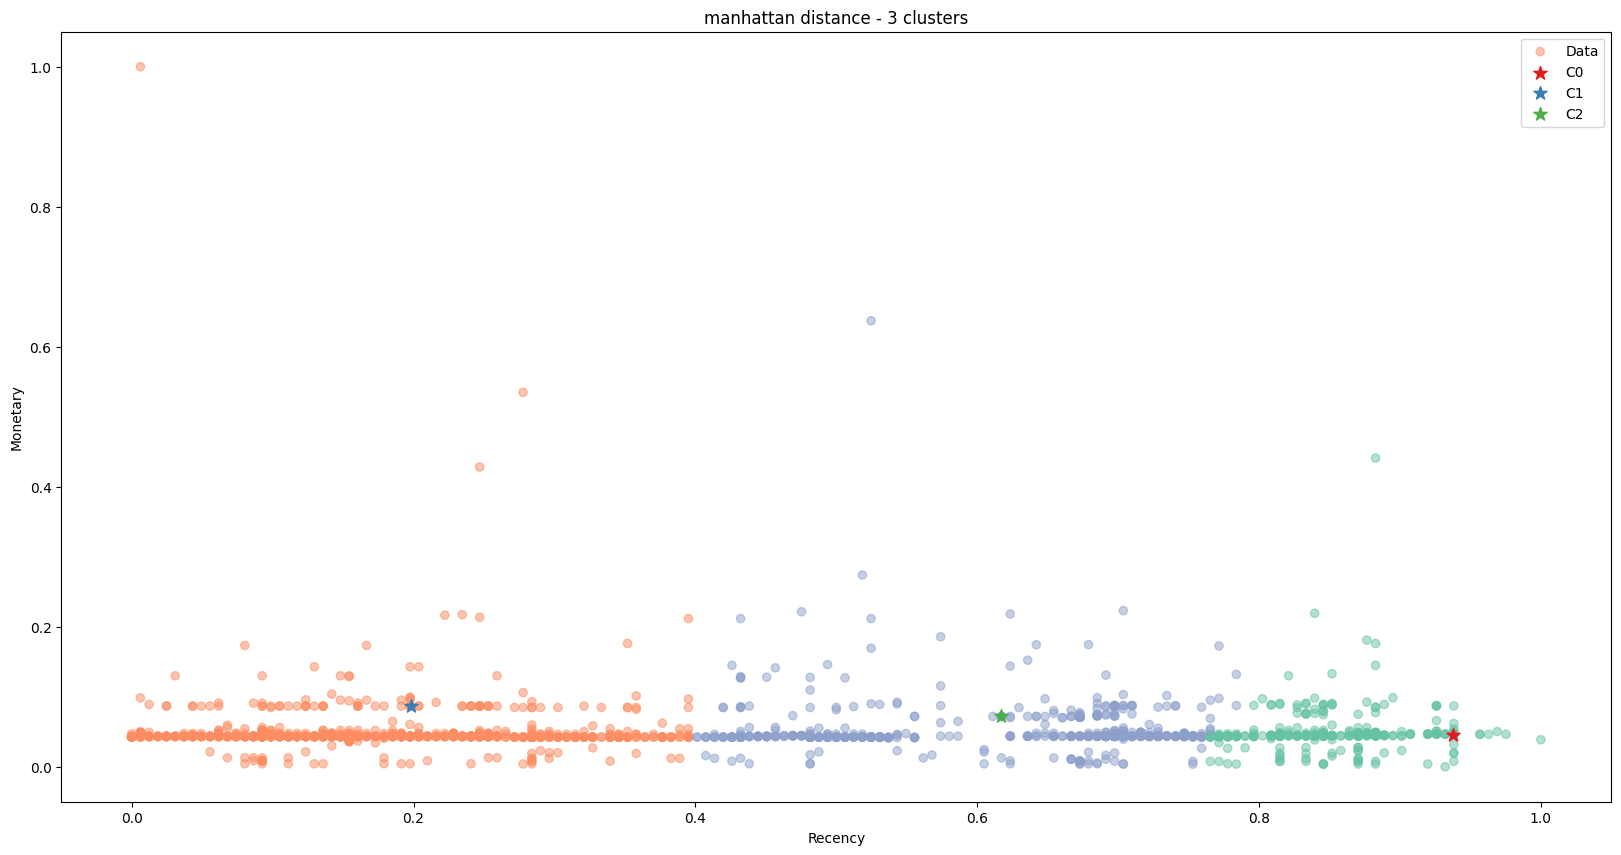

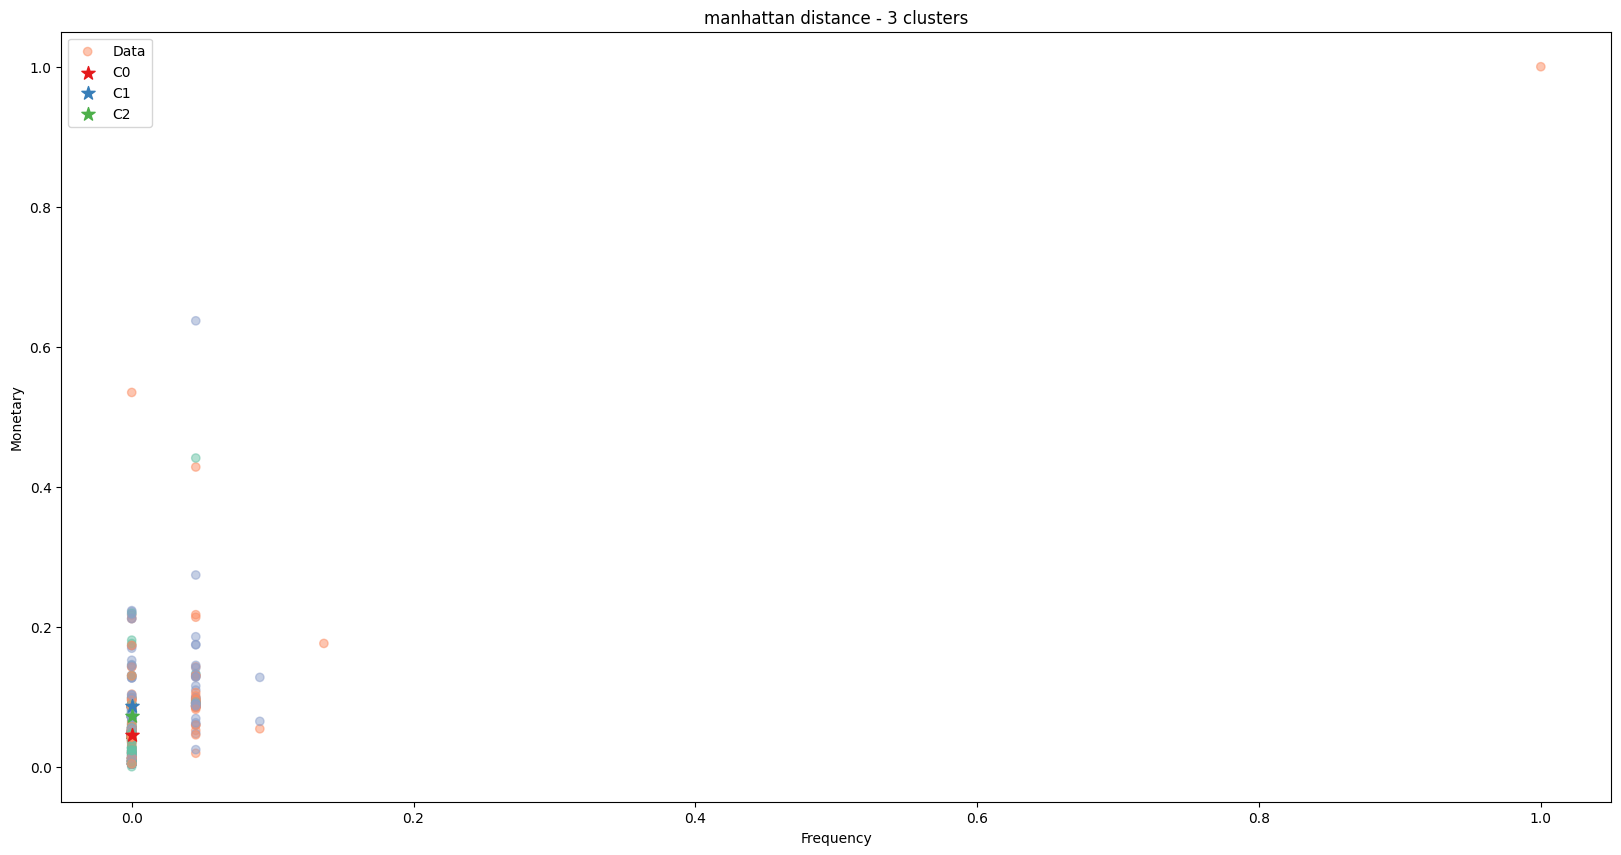

  - chebyshev distance


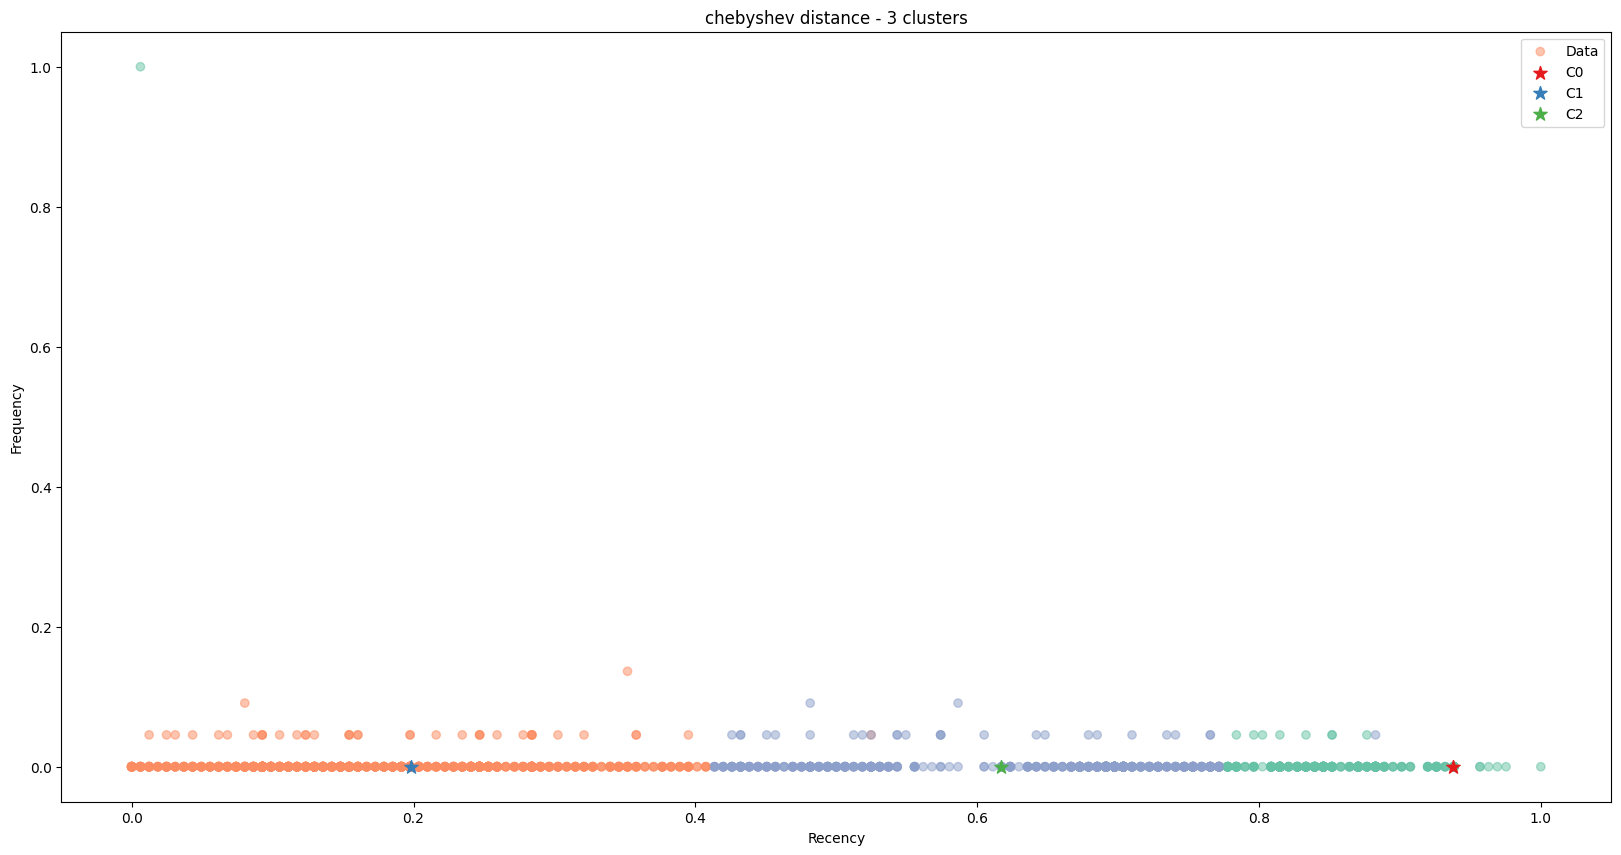

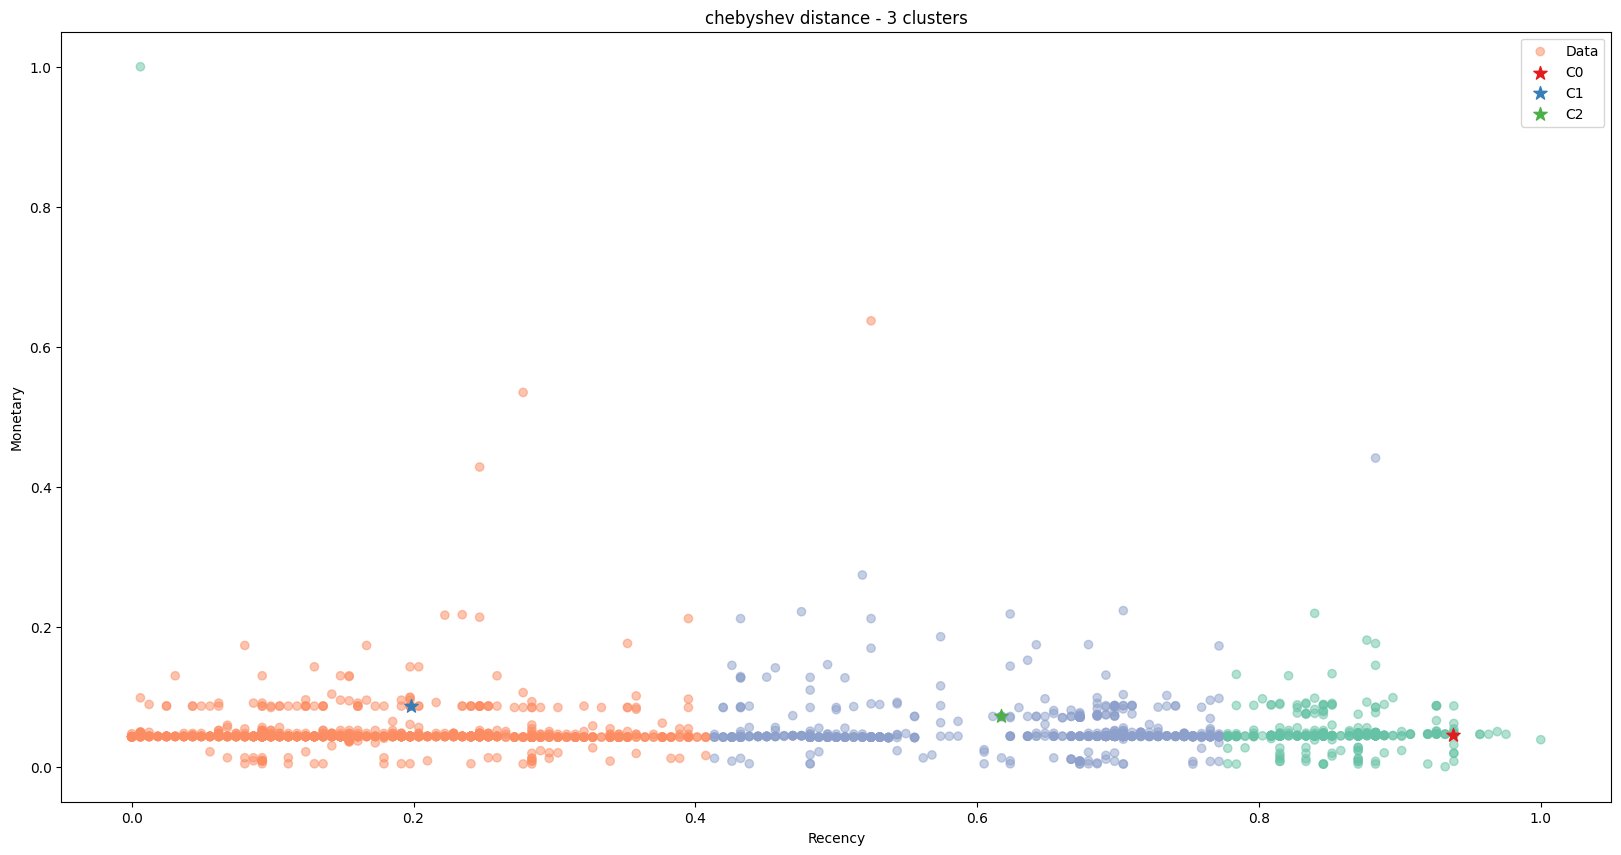

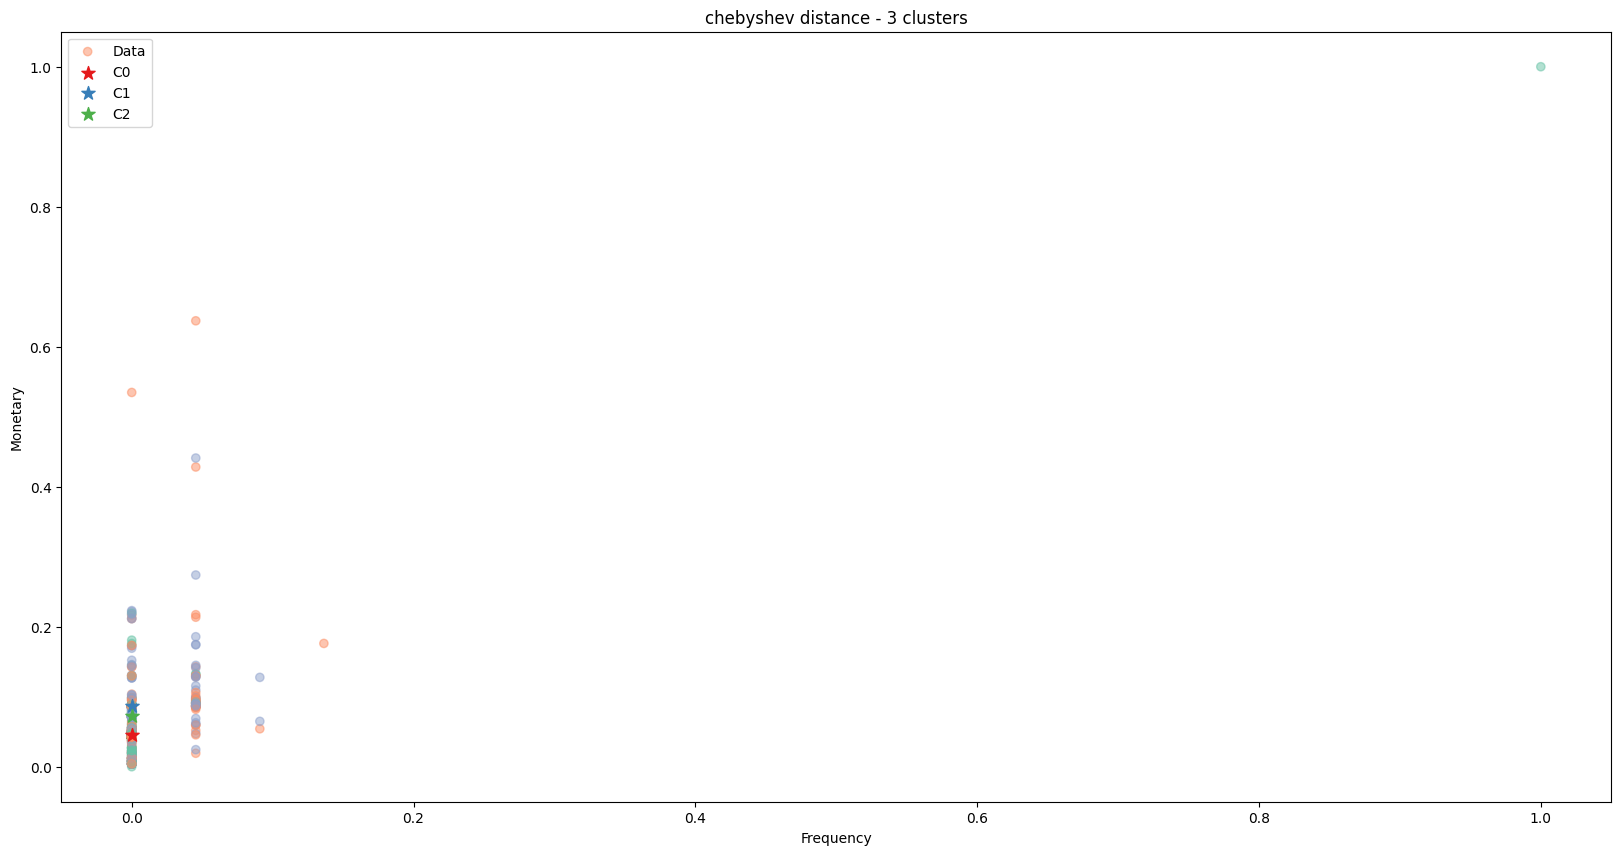

Clustering with 4 clusters:
  - euclidean distance


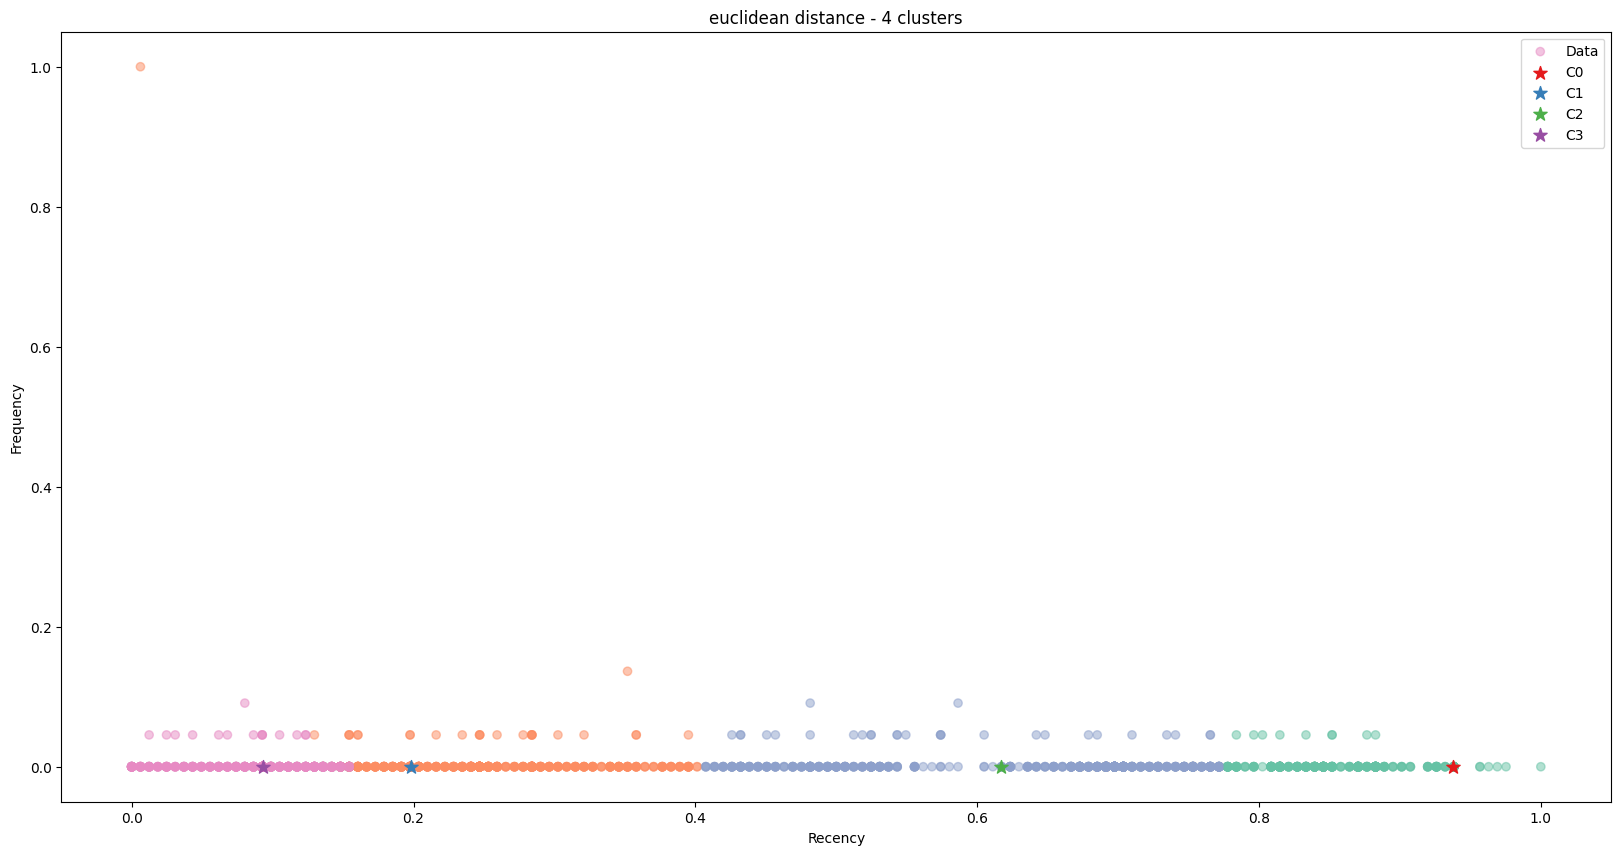

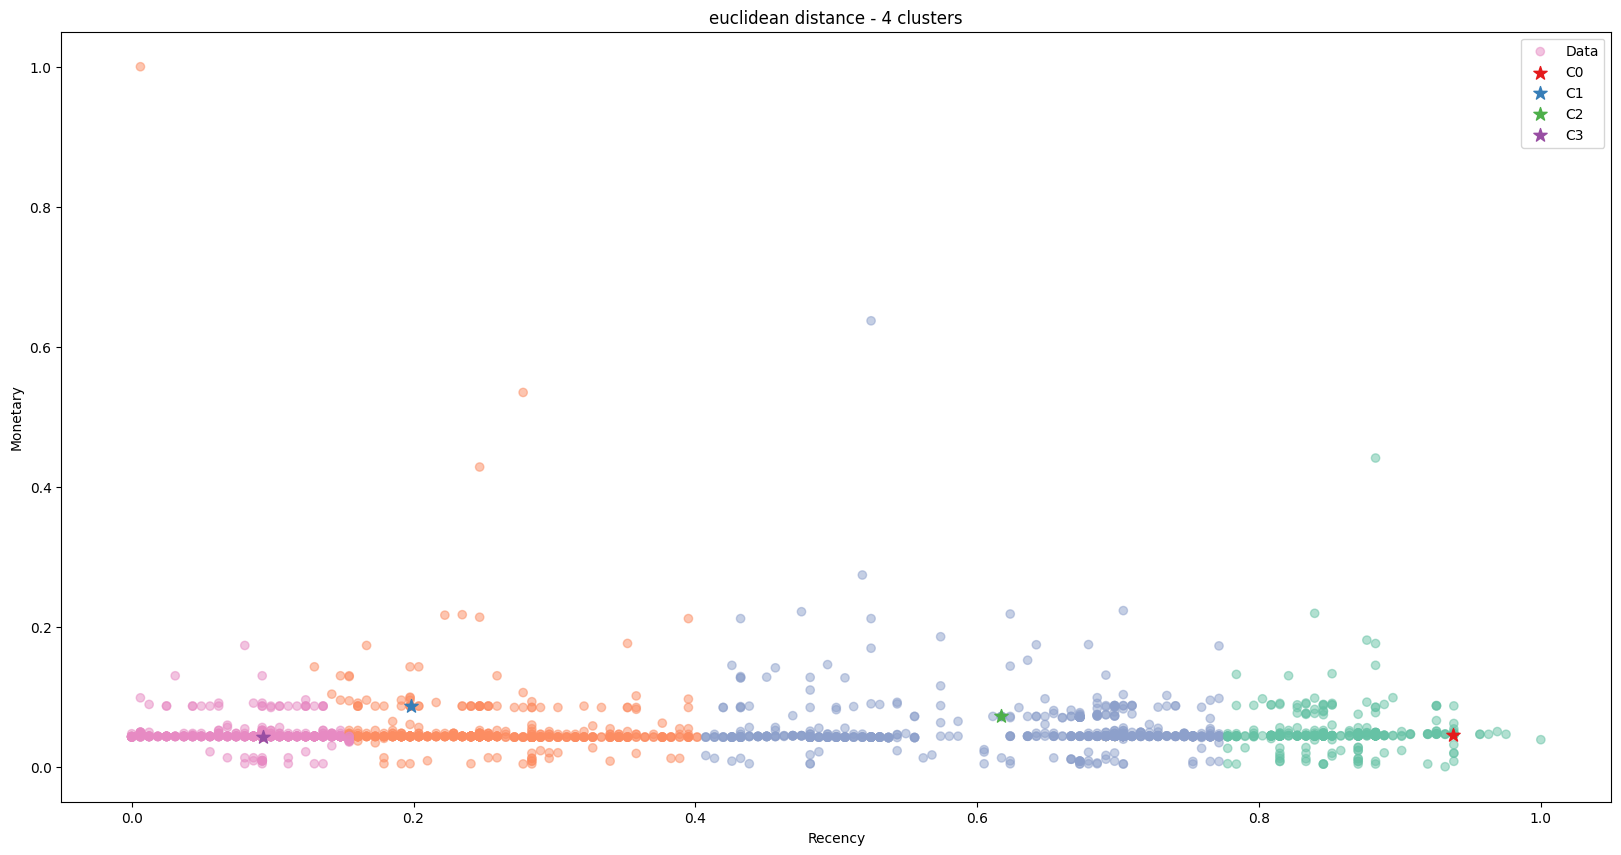

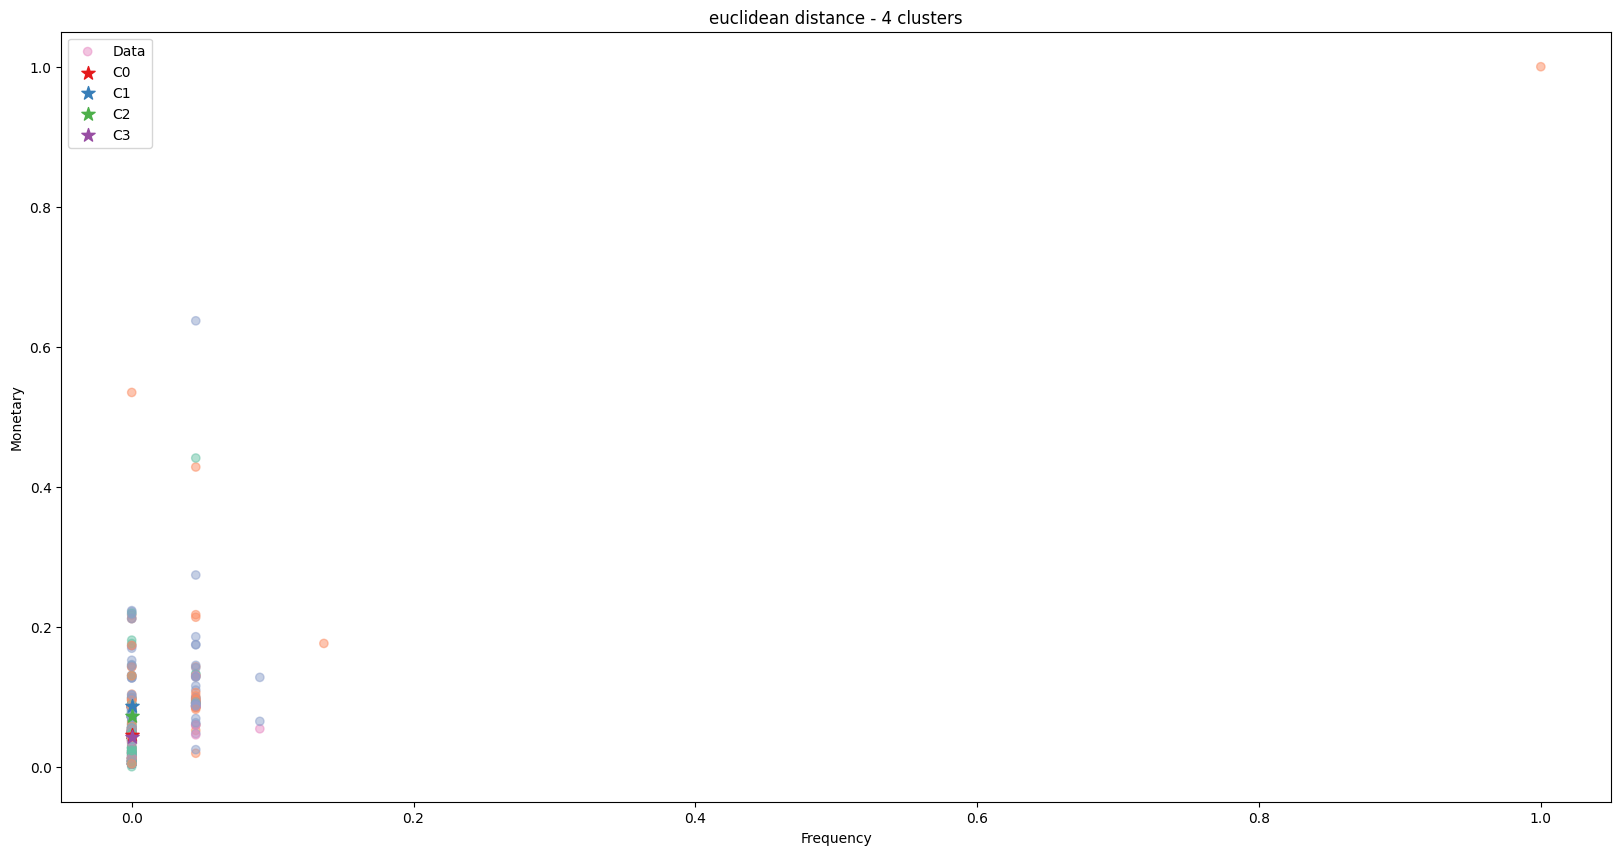

  - manhattan distance


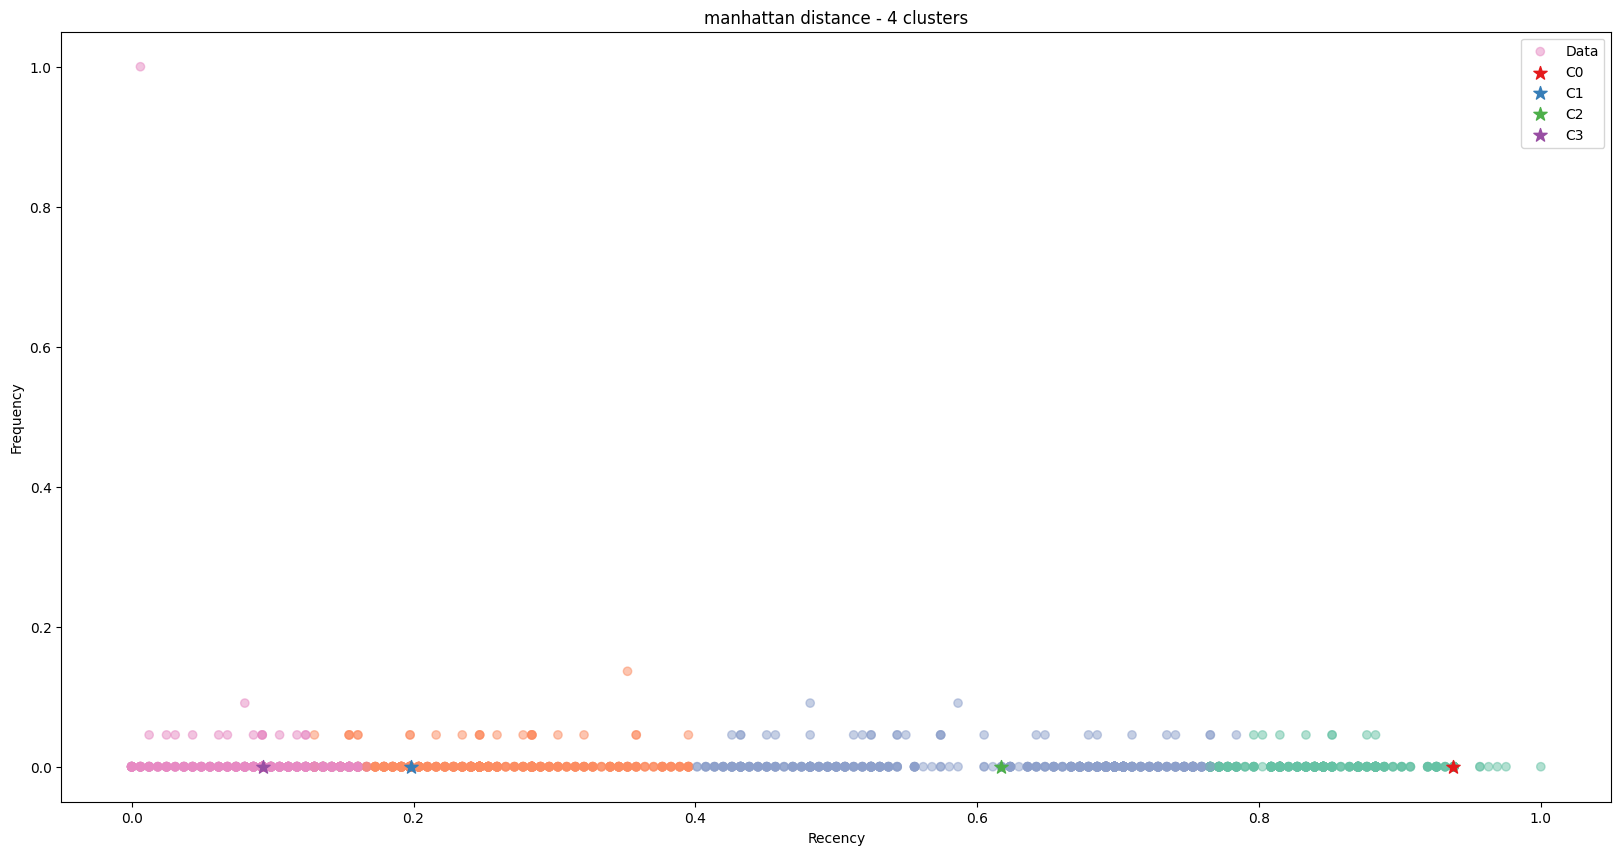

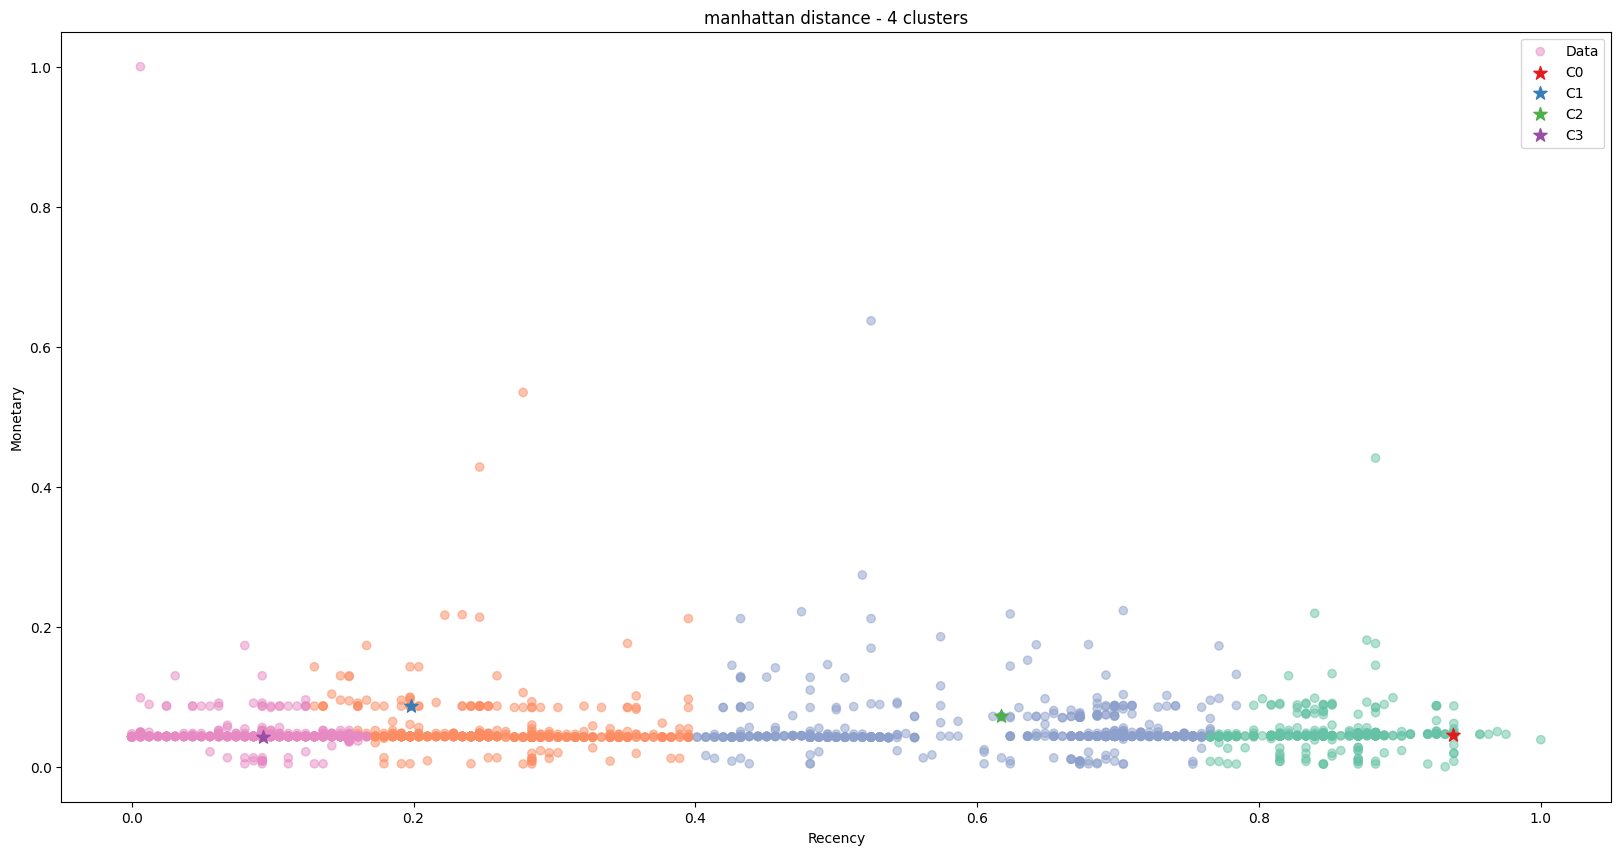

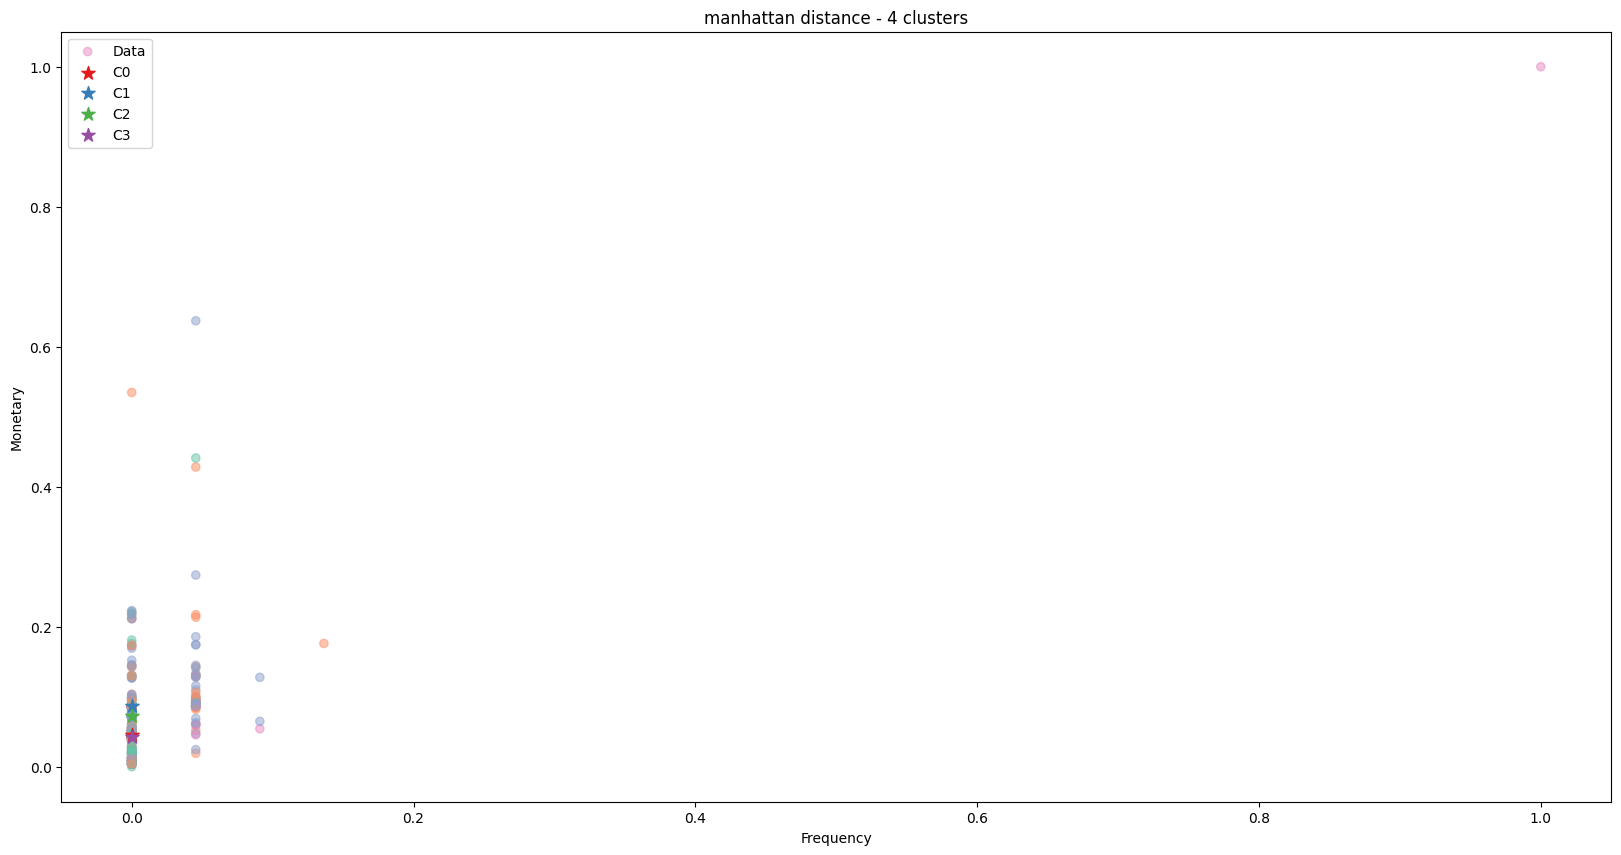

  - chebyshev distance


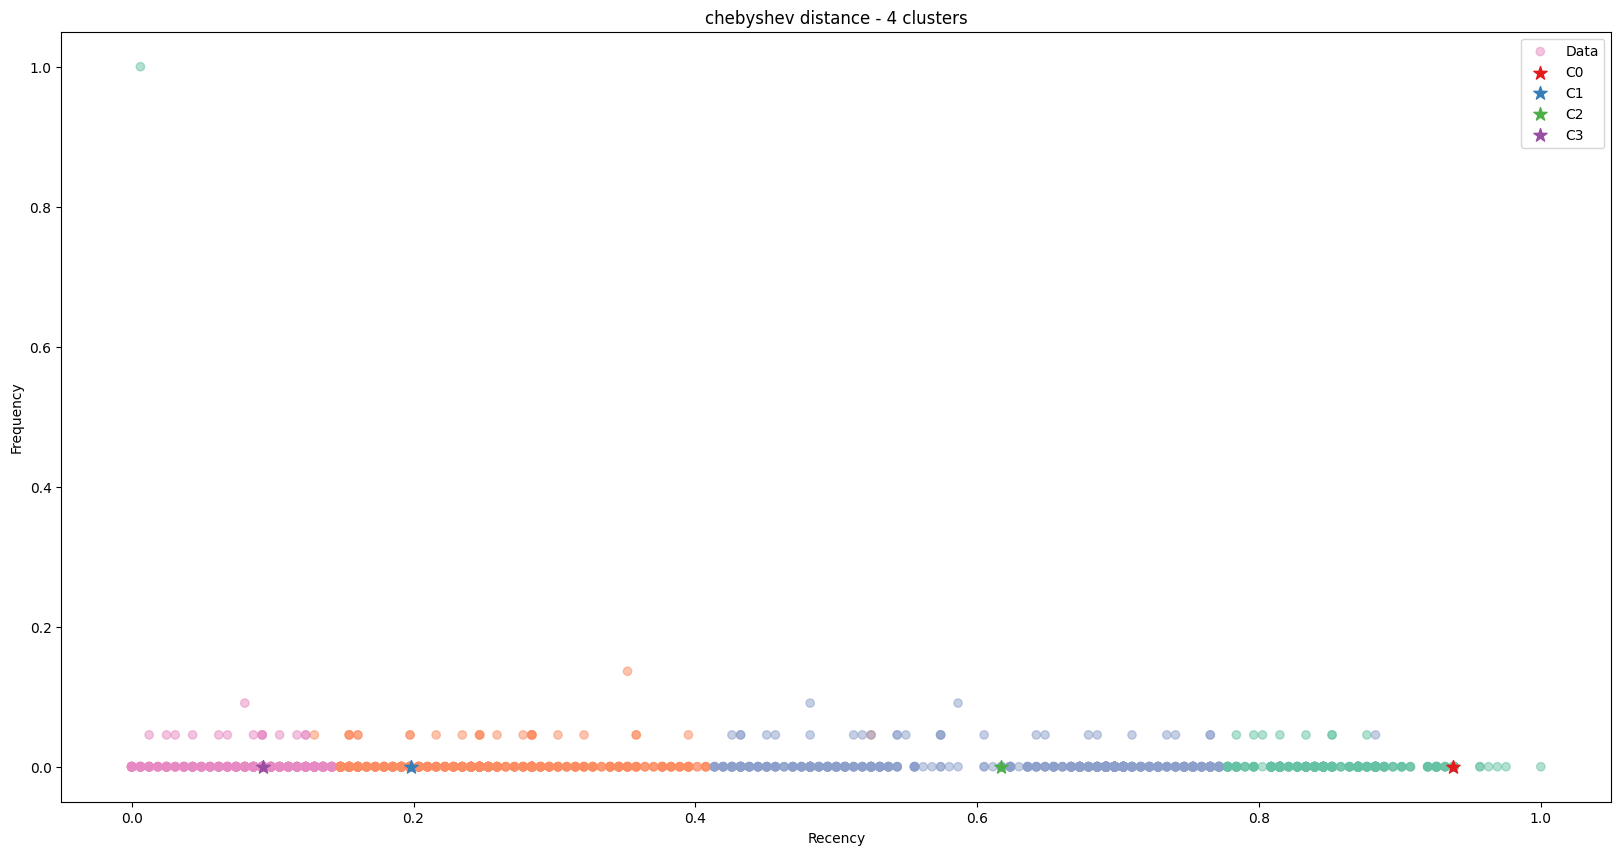

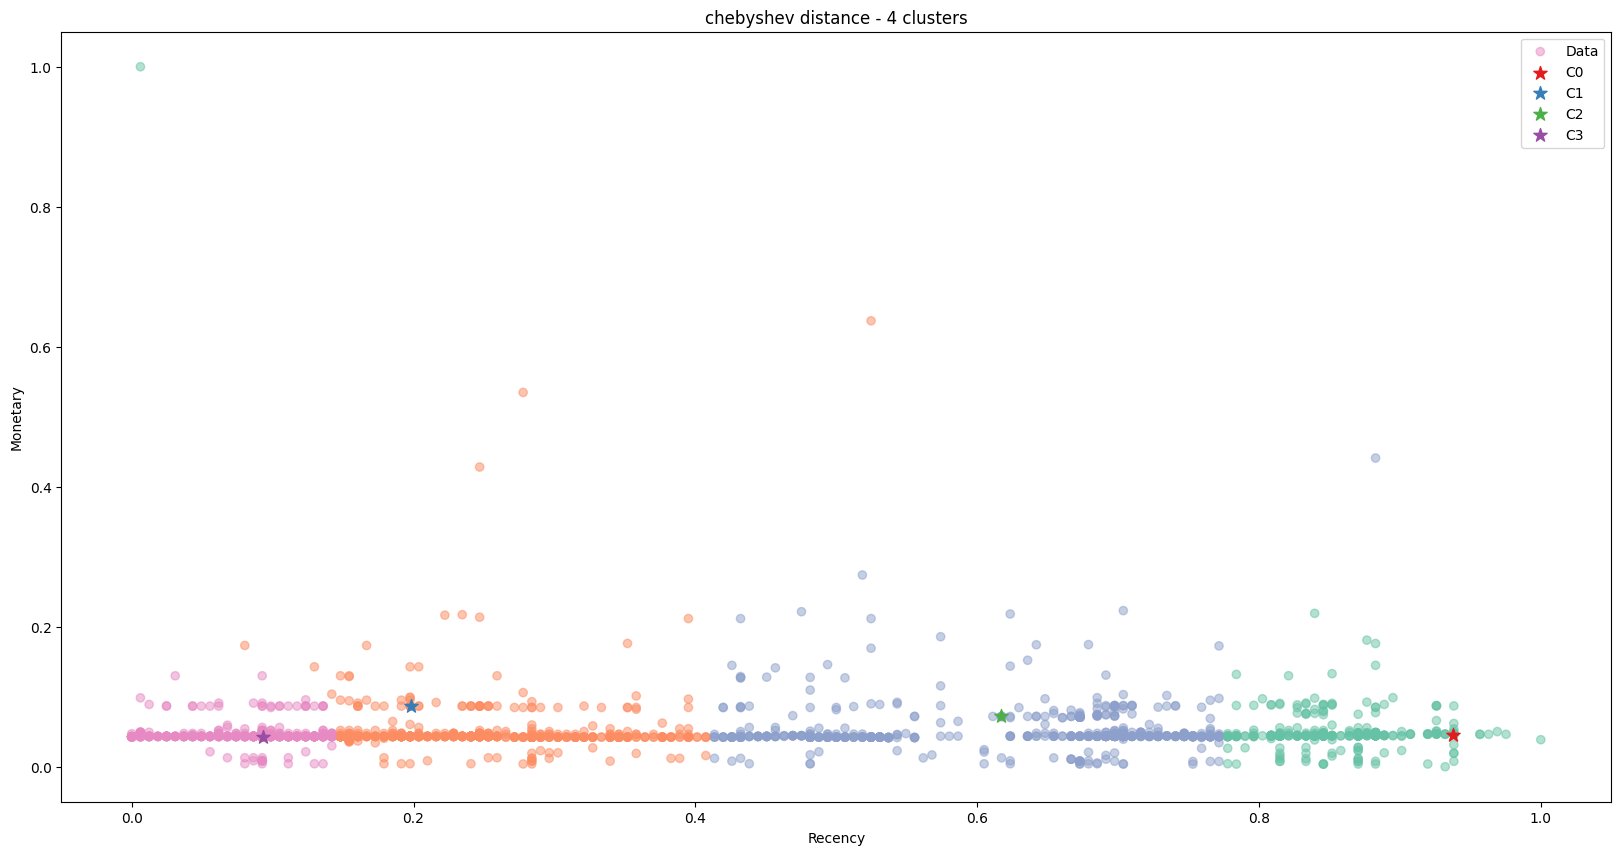

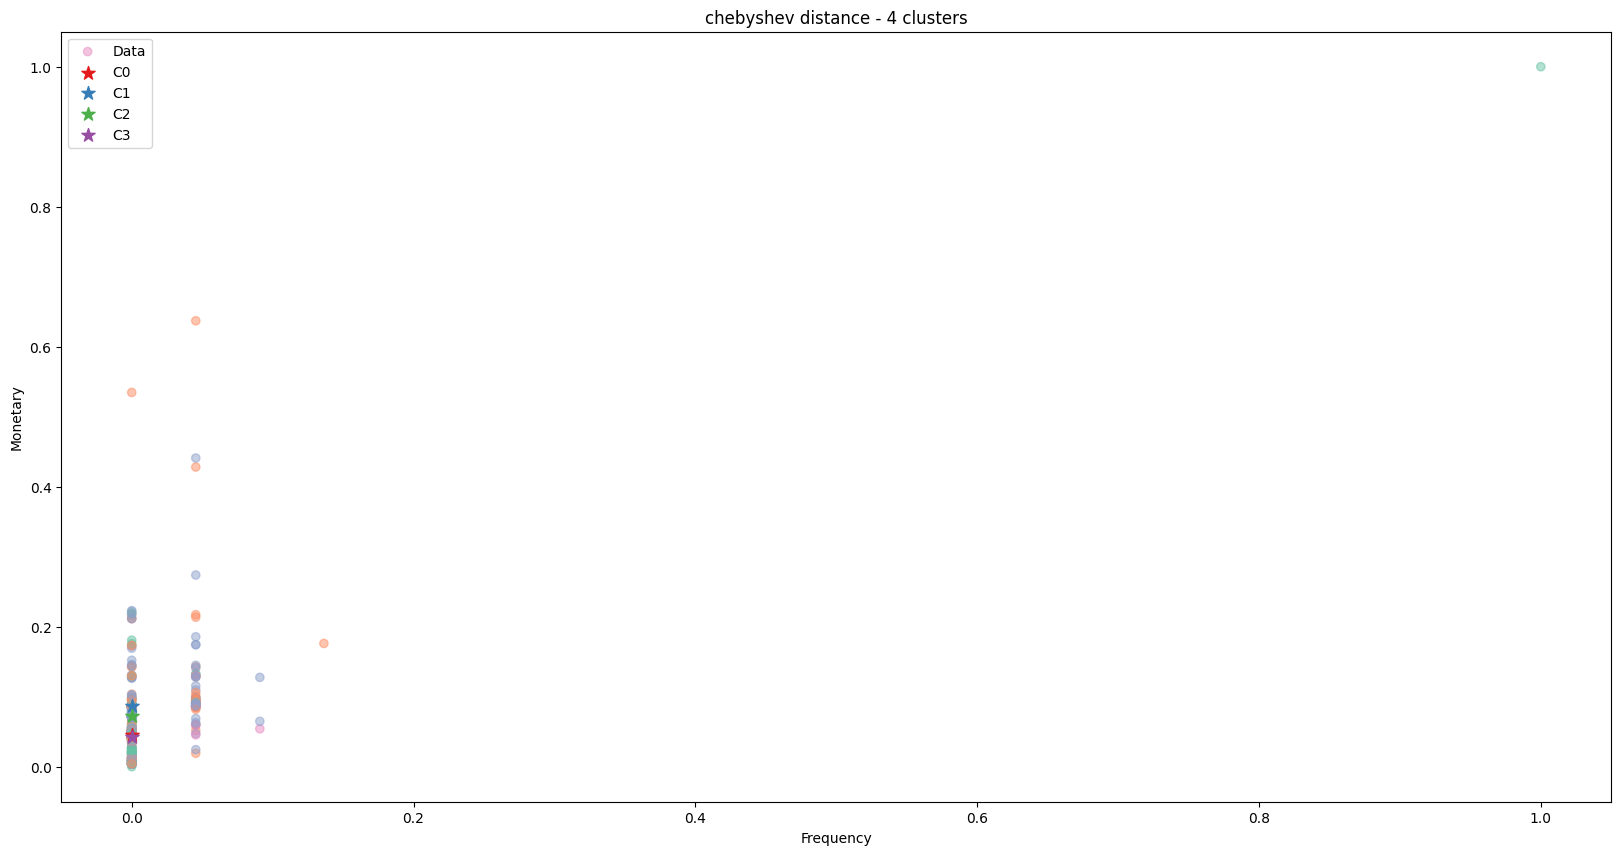

Clustering with 5 clusters:
  - euclidean distance


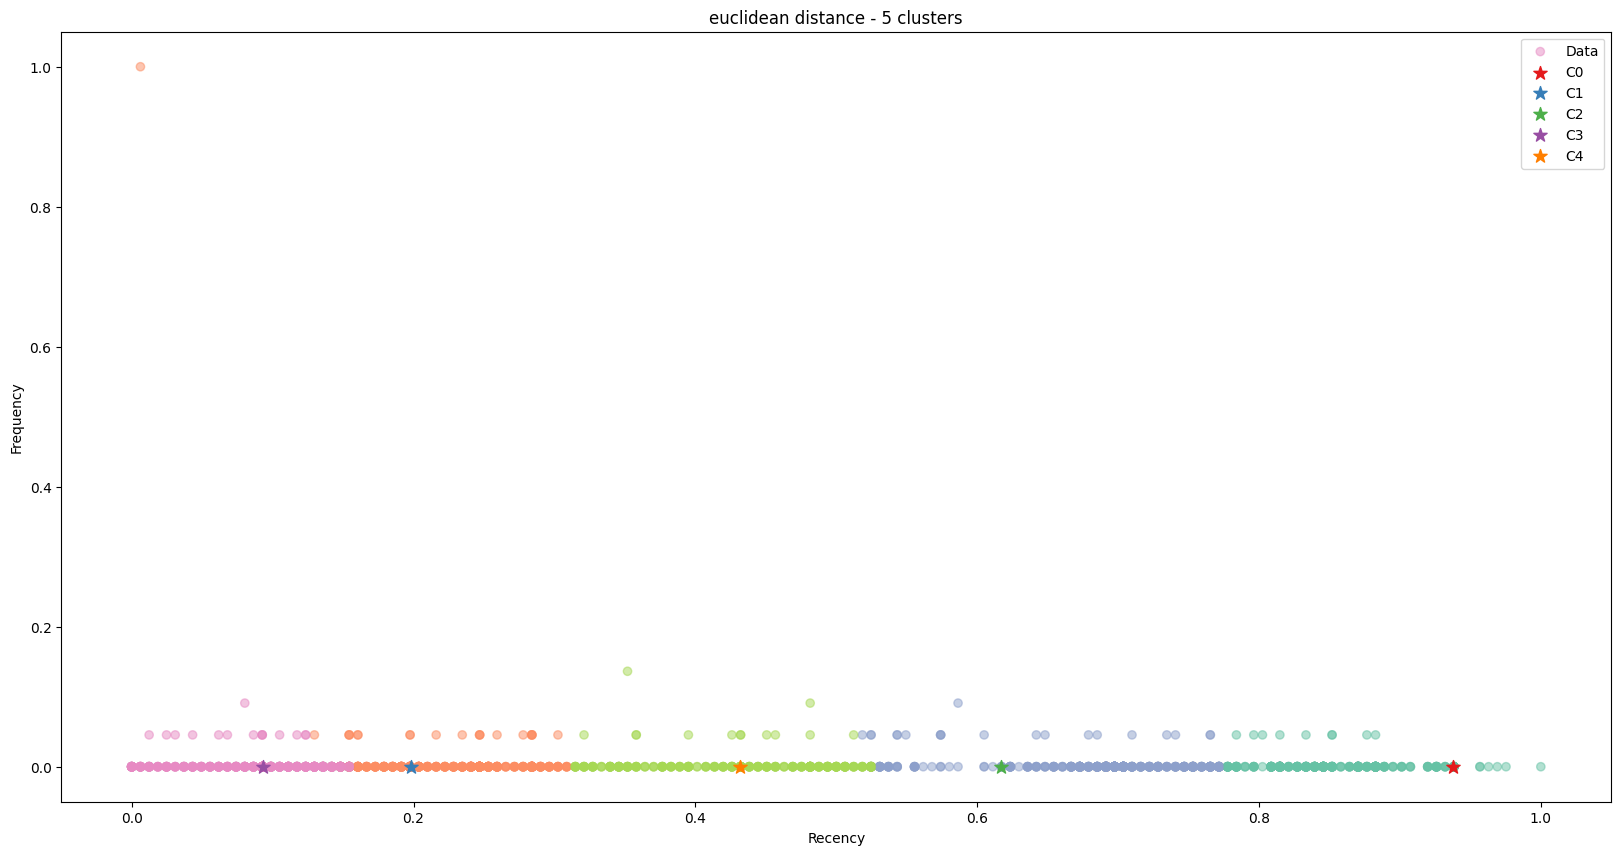

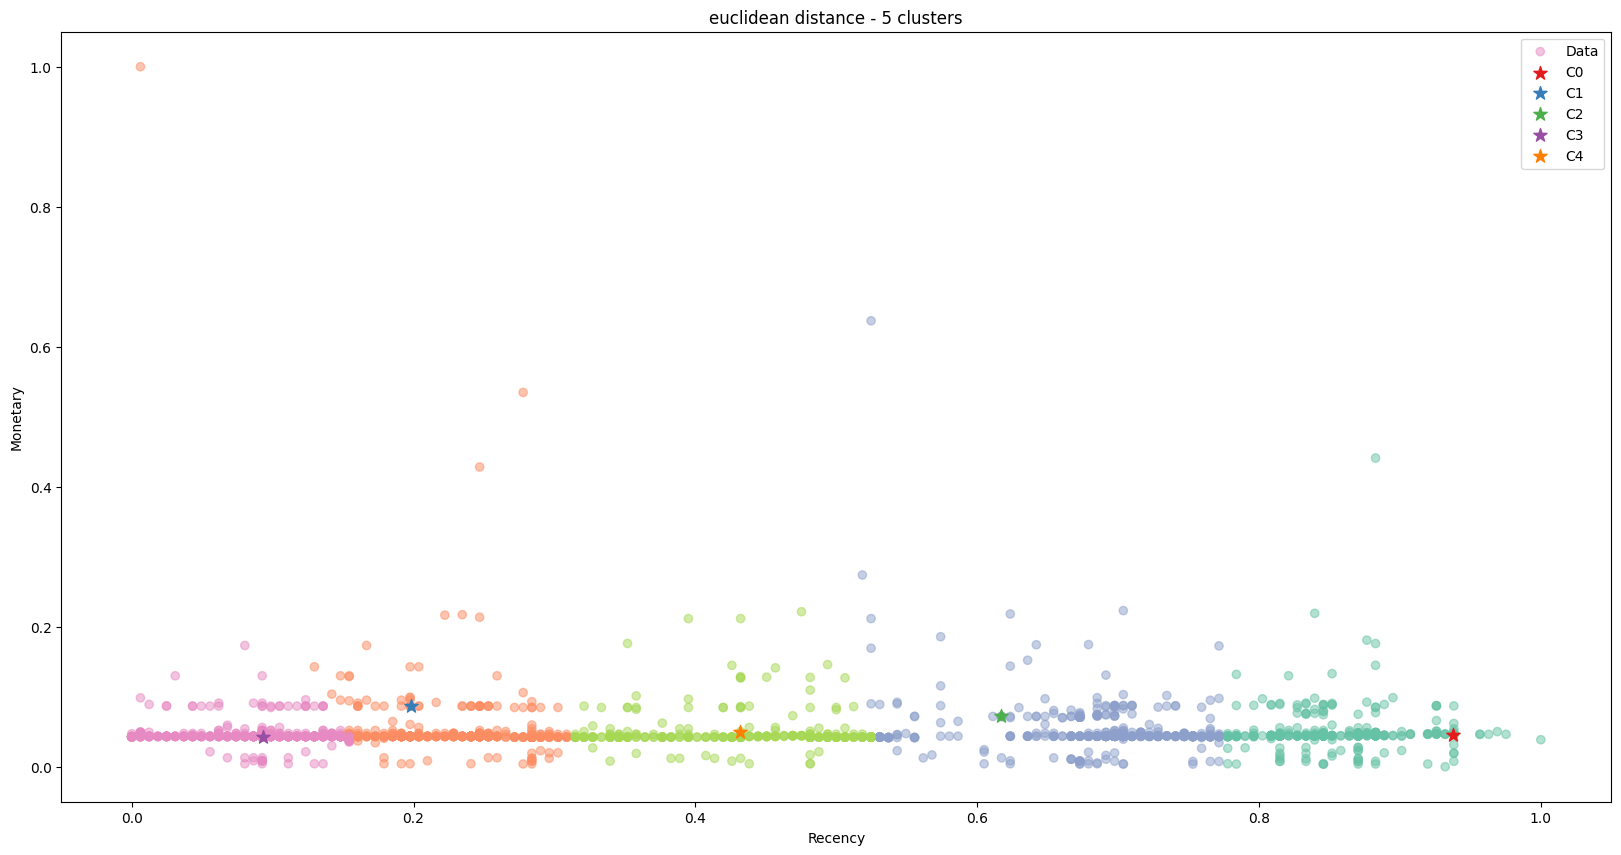

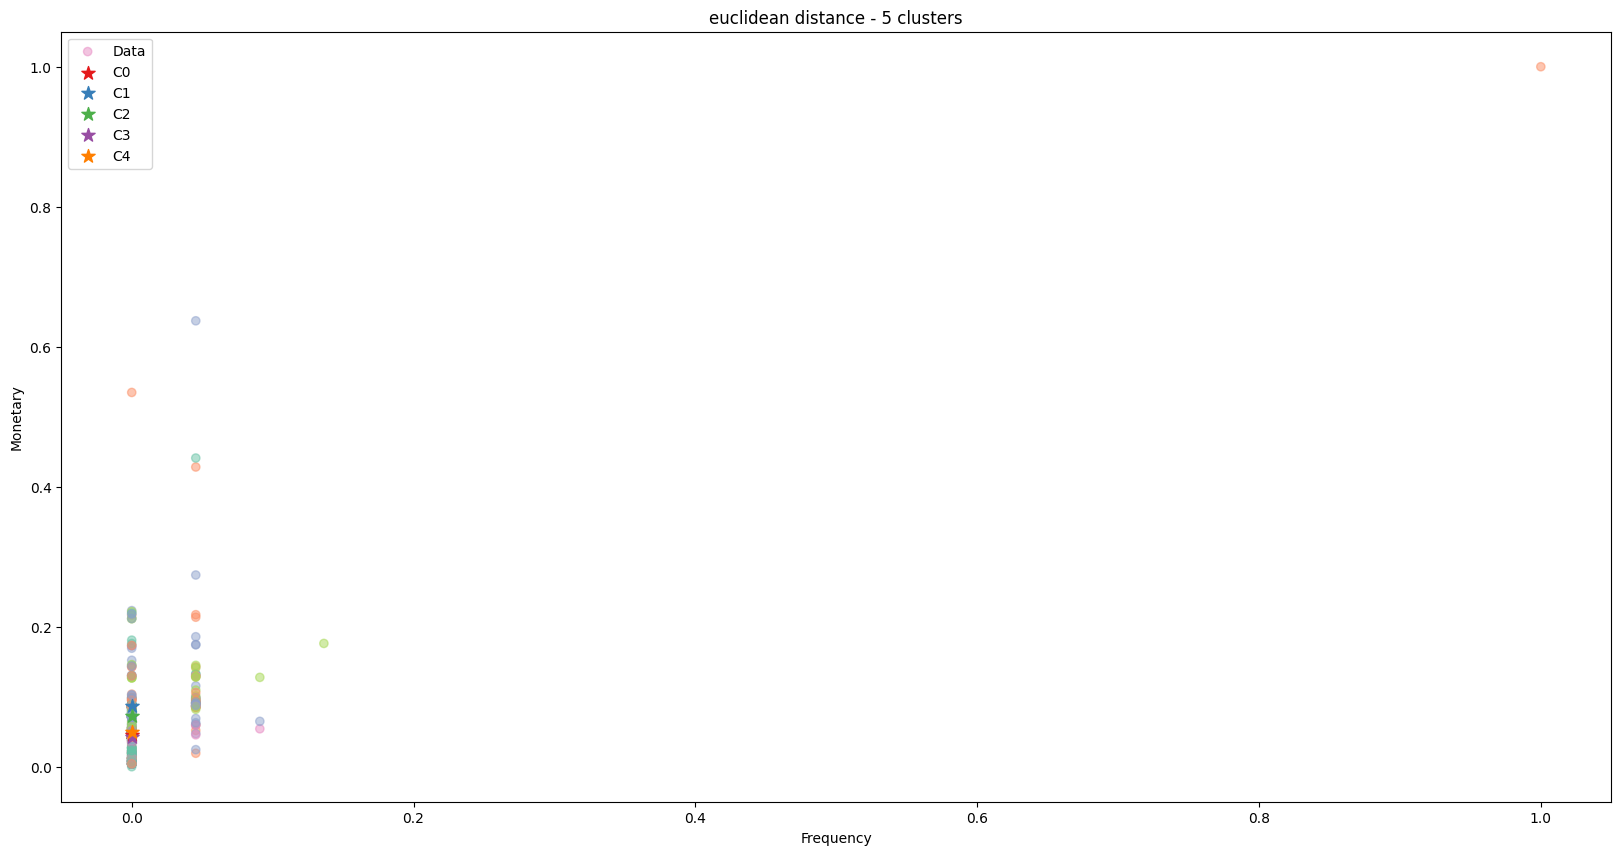

  - manhattan distance


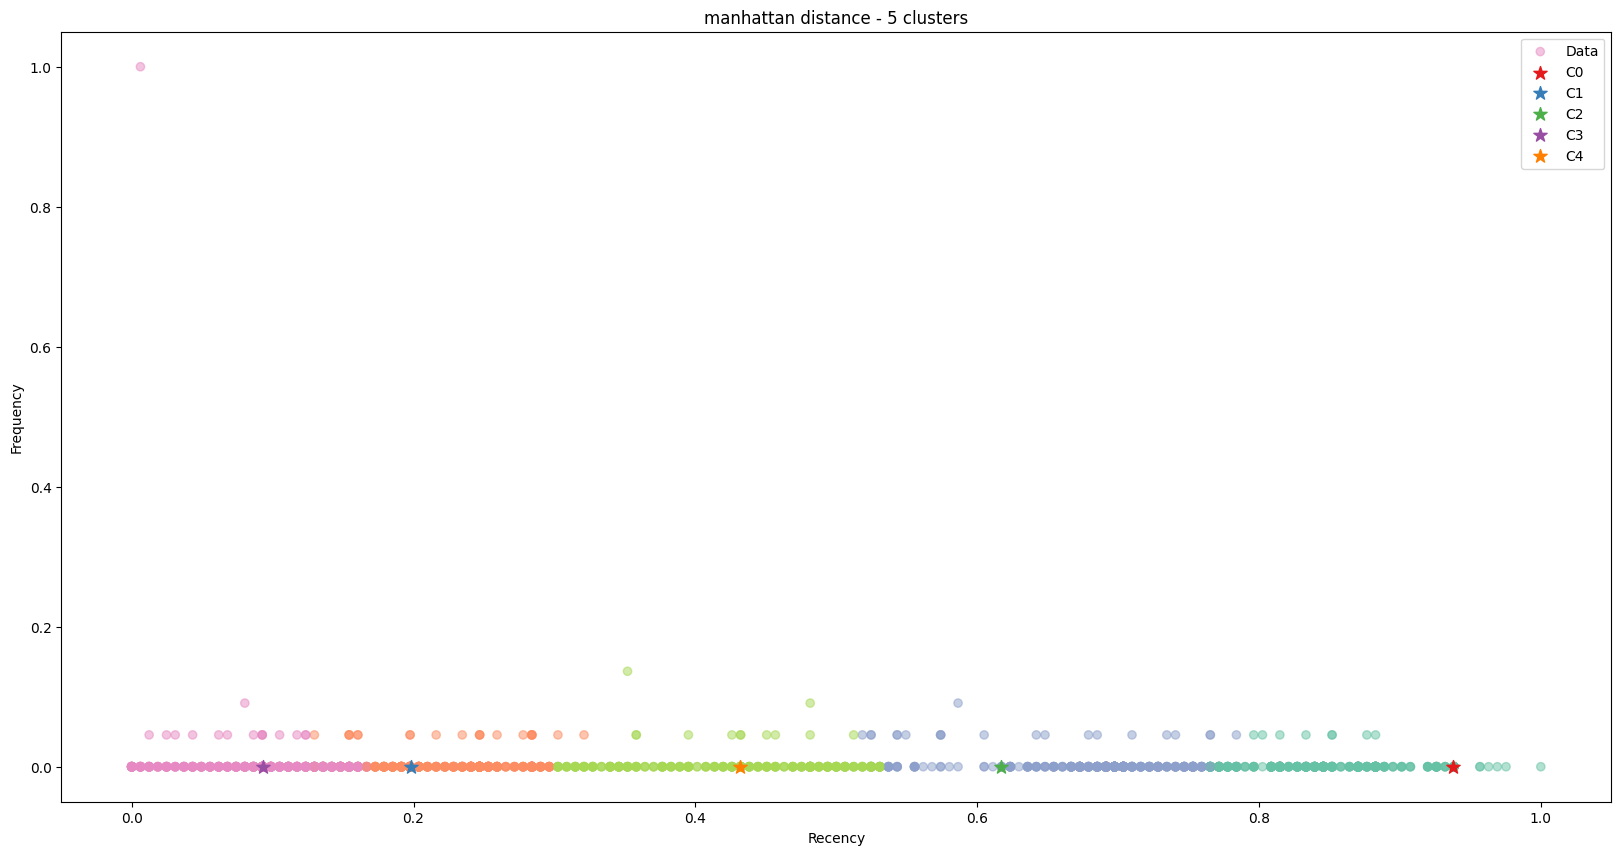

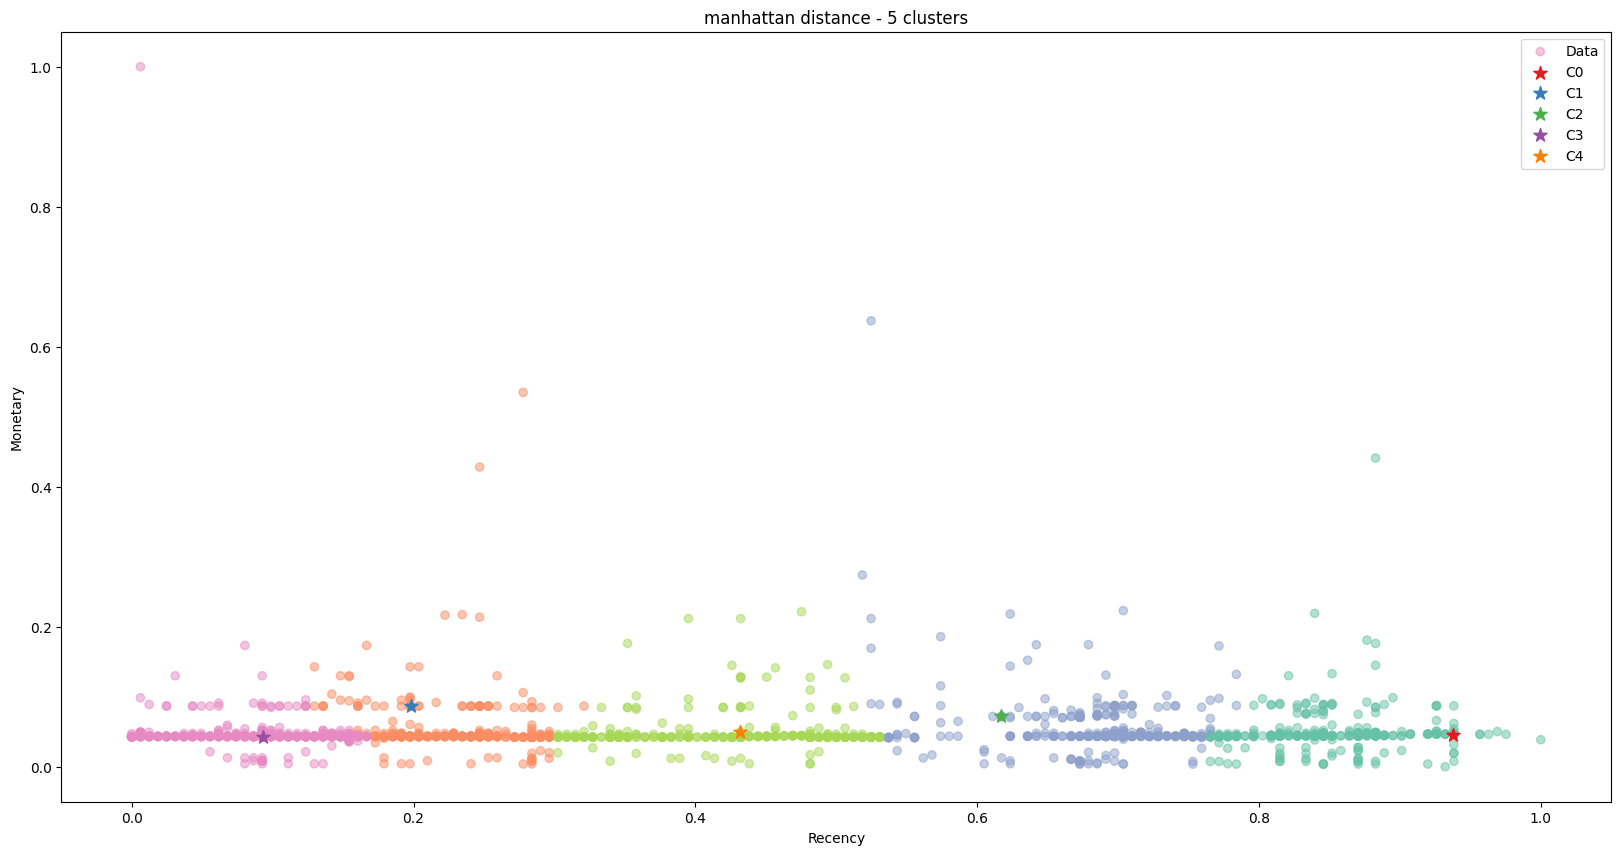

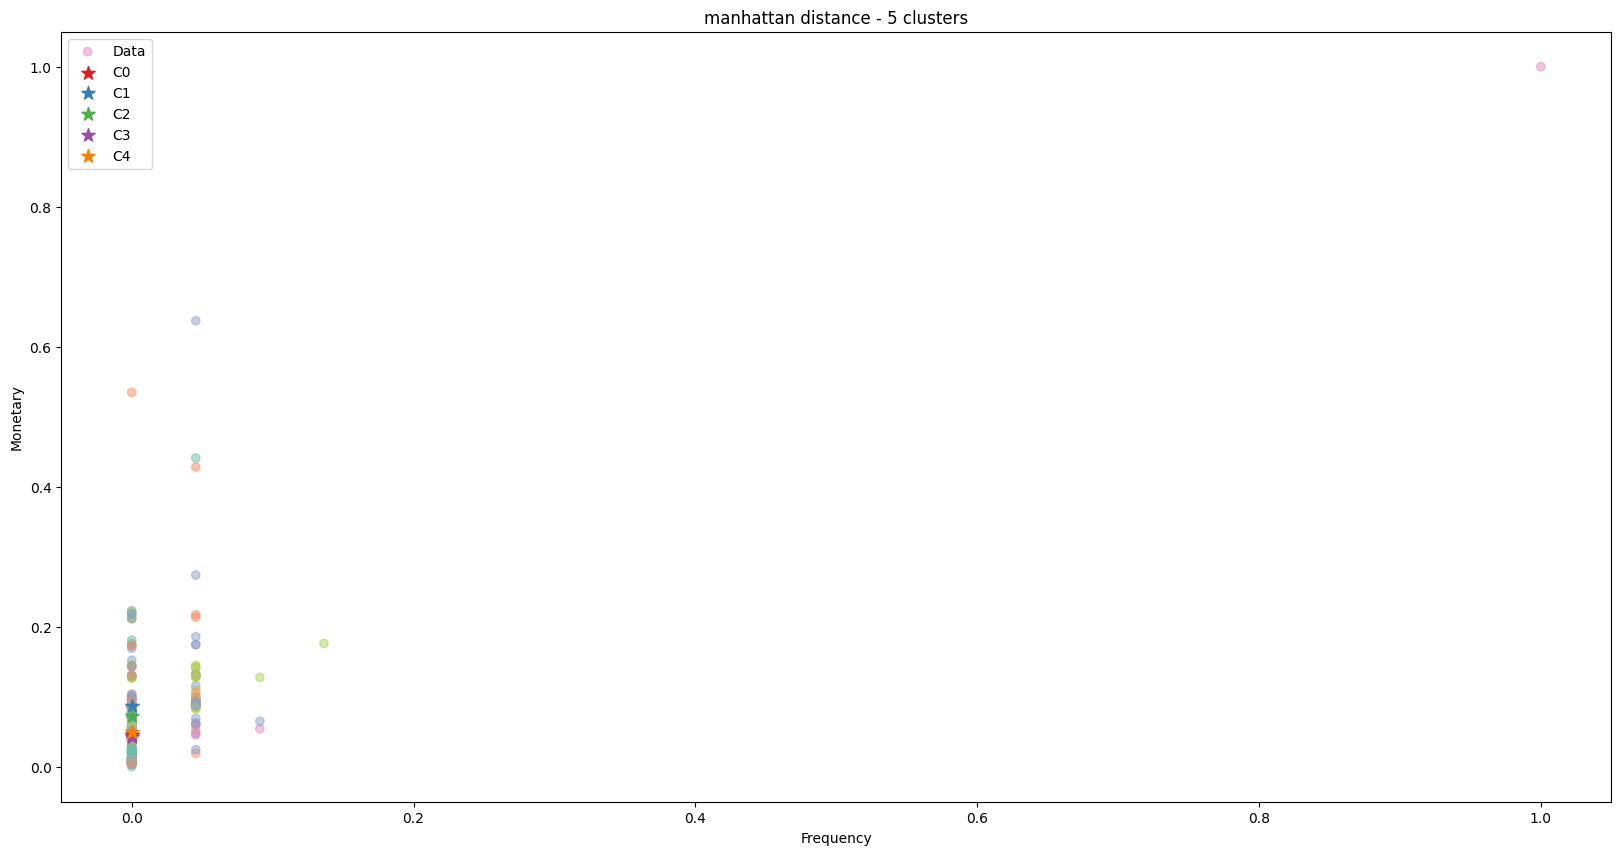

  - chebyshev distance


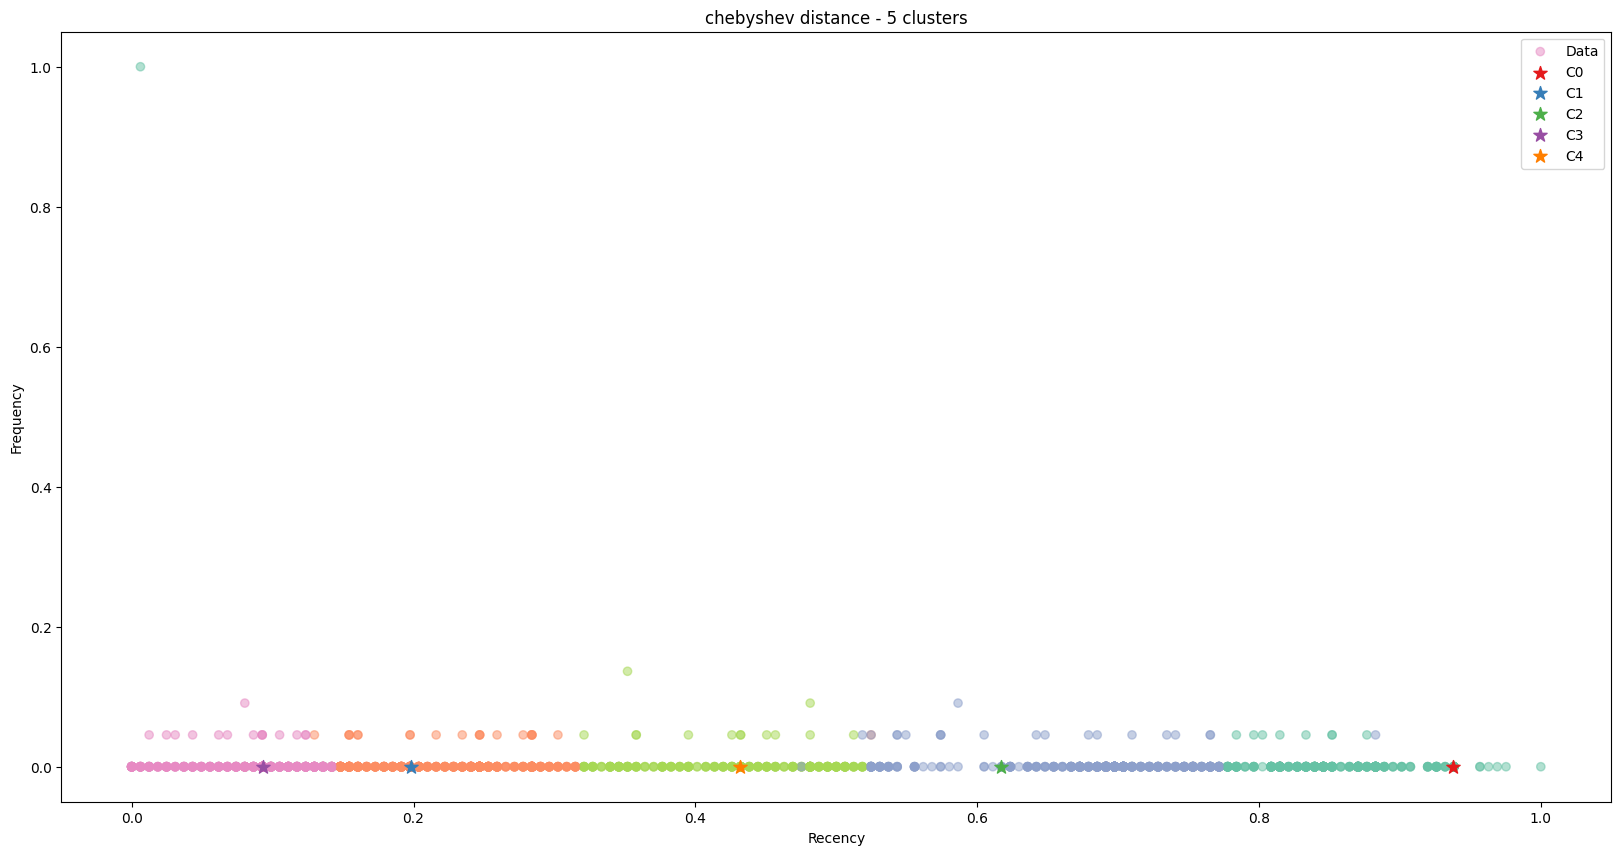

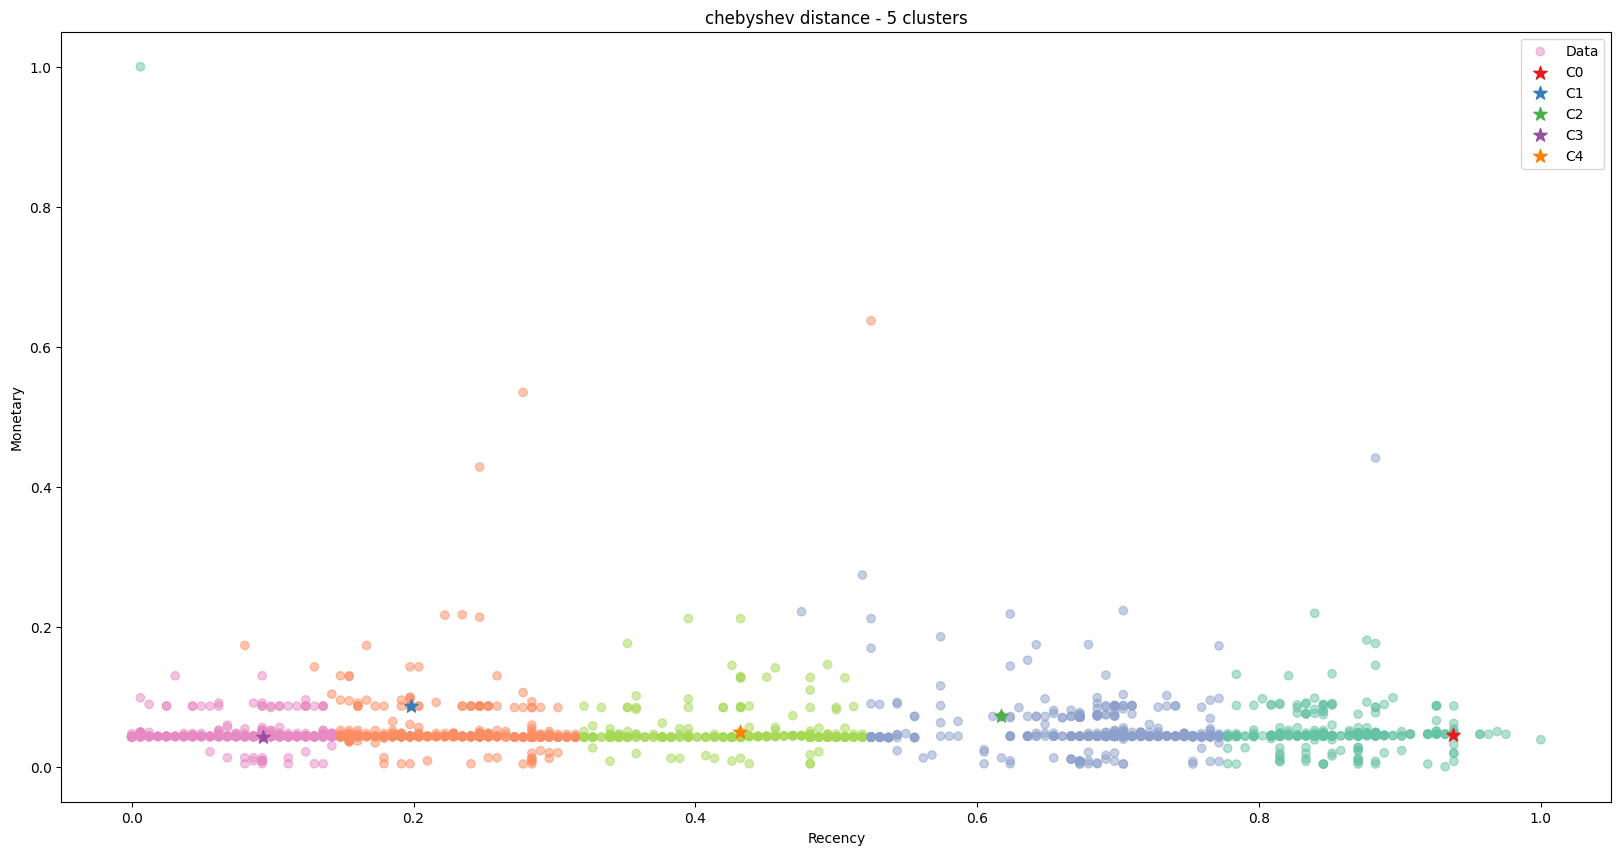

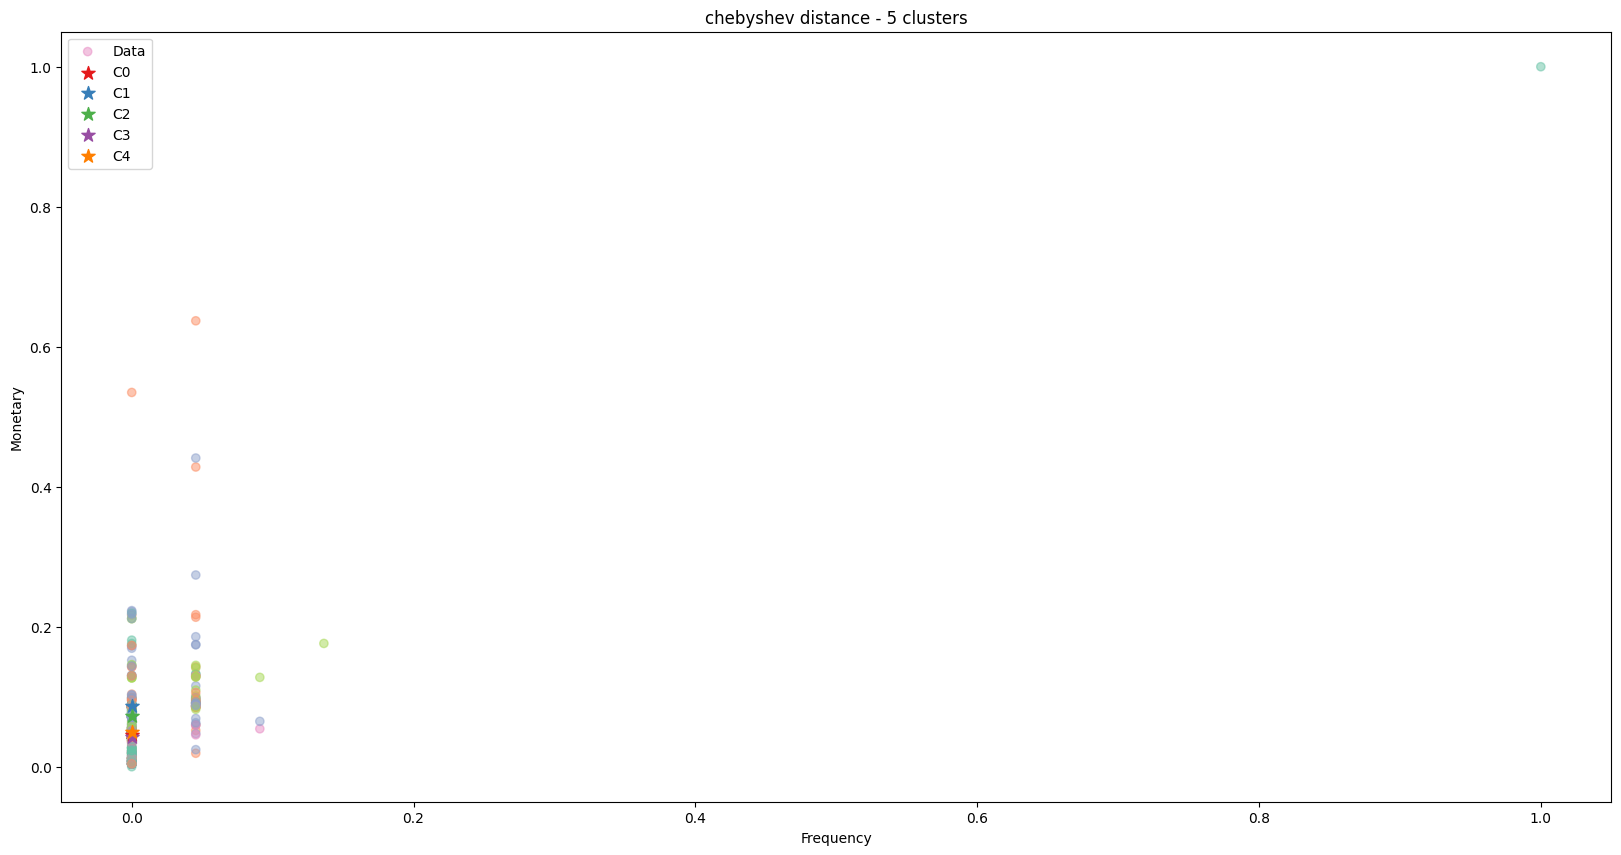

In [73]:
for n_clusters in range(2, 6):
  print(f"Clustering with {n_clusters} clusters:")
  for distance_func in [euclidean_distance, manhattan_distance, chebyshev_distance]:
    distance_name = distance_func.__name__.replace("_", " ")
    labels = custom_kmedoids(data.copy(), medoids[:n_clusters], distance_func)
    print(f"  - {distance_name}")  # print(f"  - {distance_name}: {labels}")
    for opt in [jenisFitur1, jenisFitur2, jenisFitur3]:
      plot_clusters(data.copy(), opt, labels, medoids[:n_clusters], f"{distance_name} - {n_clusters} clusters", (20, 10))